In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\Merin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_excel(r"C:\Users\Merin\OneDrive\Desktop\Framingham_DataSet.xls")
# Load the dataset training
data= pd.read_csv(r'C:\Users\Merin\OneDrive\Desktop\framingham.csv')


# Display the first few rows of the dataframe
print(df.head())

   RANDID  sex  totChol  age  sysBP  diaBP  CURSMOKE  CIGPDAY    BMI  \
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
1    2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3    6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4    6238    2    237.0   58  108.0   66.0         0      0.0  28.50   

   diabetes  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  \
0         0  ...    1         0    8766    6438      6438     6438      8766   
1         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
3         0  ...    0         0    8766    8766      8766     8766      8766   
4         0  ...    0         0    8766    8766      8766     8766      8766   

   TIMECVD  TIMEDTH  TIMEHYP  
0     6438     8766     8766  
1     6438     8766     

In [3]:
#Shape of dataset
print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 11627 
No. of Features :  39


In [4]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   sex       11627 non-null  int64  
 2   totChol   11218 non-null  float64
 3   age       11627 non-null  int64  
 4   sysBP     11627 non-null  float64
 5   diaBP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   diabetes  11627 non-null  int64  
 10  BPMeds    11034 non-null  float64
 11  HEARTRE   11621 non-null  float64
 12  glucose   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [5]:
#Statistical summary of the dataset
df.describe()

RANDID           sex       totChol           age         sysBP  \
count  1.162700e+04  11627.000000  11218.000000  11627.000000  11627.000000   
mean   5.004741e+06      1.568074    241.162418     54.792810    136.324116   
std    2.900877e+06      0.495366     45.368030      9.564299     22.798625   
min    2.448000e+03      1.000000    107.000000     32.000000     83.500000   
25%    2.474378e+06      1.000000    210.000000     48.000000    120.000000   
50%    5.006008e+06      2.000000    238.000000     54.000000    132.000000   
75%    7.472730e+06      2.000000    268.000000     62.000000    149.000000   
max    9.999312e+06      2.000000    696.000000     81.000000    295.000000   

              diaBP      CURSMOKE       CIGPDAY           BMI      diabetes  \
count  11627.000000  11627.000000  11548.000000  11575.000000  11627.000000   
mean      83.037757      0.432528      8.250346     25.877349      0.045584   
std       11.660144      0.495448     12.186888      4.102640      0.208589   
min       30.000000      0.000000      0.000000     14.430000      0.000000   
25%       75.000000      0.000000      0.000000     23.095000      0.000000   
50%       82.000000      0.000000      0.000000     25.480000      0.000000   
75%       90.000000      1.000000     20.000000     28.070000      0.000000   
max      150.000000      1.000000     90.000000     56.800000      1.000000   

       ...           CVD      HYPERTEN        TIMEAP        TIMEMI  \
count  ...  11627.000000  11627.000000  11627.000000  11627.000000   
mean   ...      0.249333      0.743270   7241.556893   7593.846736   
std    ...      0.432646      0.436848   2477.780010   2136.730285   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000   6224.000000   7212.000000   
50%    ...      0.000000      1.000000   8766.000000   8766.000000   
75%    ...      0.000000      1.000000   8766.000000   8766.000000   
max    ...      1.000000      1.000000   8766.000000   8766.000000   

           TIMEMIFC       TIMECHD      TIMESTRK       TIMECVD       TIMEDTH  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean    7543.036725   7008.153608   7660.880021   7166.082996   7854.102950   
std     2192.120311   2641.344513   2011.077091   2541.668477   1788.369623   
min        0.000000      0.000000      0.000000      0.000000     26.000000   
25%     7049.500000   5598.500000   7295.000000   6004.000000   7797.500000   
50%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
75%     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   
max     8766.000000   8766.000000   8766.000000   8766.000000   8766.000000   

            TIMEHYP  
count  11627.000000  
mean    3598.956395  
std     3464.164659  
min        0.000000  
25%        0.000000  
50%     2429.000000  
75%     7329.000000  
max     8766.000000  

[8 rows x 39 columns]

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Impute numerical columns with mean
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['CIGPDAY'].fillna(df['CIGPDAY'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['HEARTRE'].fillna(df['HEARTRE'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['HDLC'].fillna(df['HDLC'].mean(), inplace=True)
df['LDLC'].fillna(df['LDLC'].mean(), inplace=True)
# Impute categorical columns with mode (most frequent value)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['educ'].fillna(df['educ'].mode()[0], inplace=True)



RANDID         0
sex            0
totChol      409
age            0
sysBP          0
diaBP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
diabetes       0
BPMeds       593
HEARTRE        6
glucose     1440
educ         295
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64


C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\4032677945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totChol'].fillna(df['totChol'].mean(), inplace=True)
C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\4032677945.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [7]:
# Frequency distribution of event variables
event_vars = ['ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'DEATH']

# Frequency distribution of event variables
event_distribution = df[event_vars].apply(lambda x: x.value_counts())
print("\nEvent Variables Distribution:\n", event_distribution)


Event Variables Distribution:
    ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE   CVD  HYPERTEN  DEATH
0    9725   10473     9839    8469   10566  8728      2985   8100
1    1902    1154     1788    3158    1061  2899      8642   3527


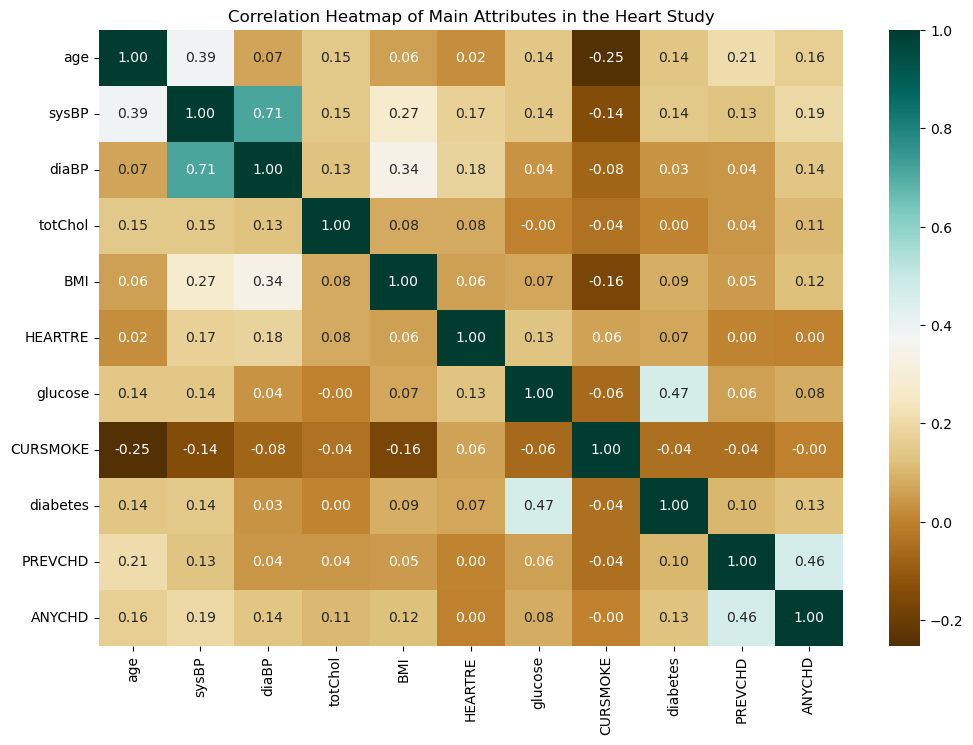

In [8]:
# Main attributes for the Framingham heart study
main_attributes = [
    'age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'HEARTRE', 
    'glucose', 'CURSMOKE', 'diabetes', 'PREVCHD', 'ANYCHD'
    
]

# Compute the correlation matrix for main attributes
correlation_matrix = df[main_attributes].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f")
plt.title('Correlation Heatmap of Main Attributes in the Heart Study')
plt.show()

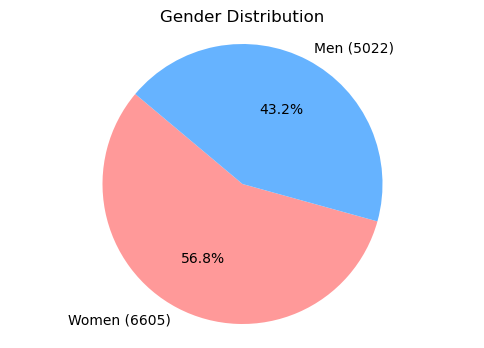

In [9]:
# Count the occurrences of each category in the 'Sex' column
gender_counts = df['sex'].value_counts()

# Define labels for the categories (assuming 1=Men and 2=Women based on typical encoding)
labels = gender_counts.index.map({1: 'Men', 2: 'Women'})

# Include the total number of each gender in the labels
labels = [f'{label} ({count})' for label, count in zip(labels, gender_counts)]

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


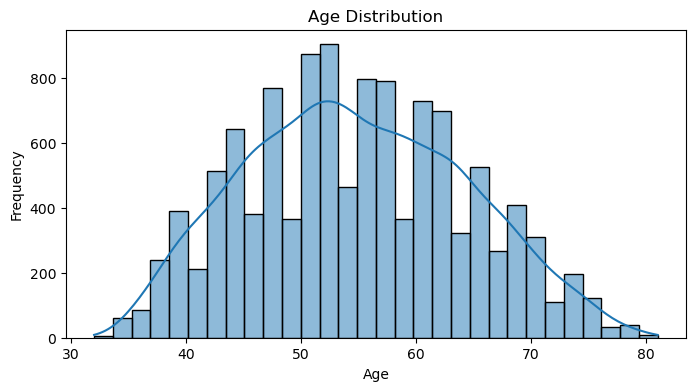

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


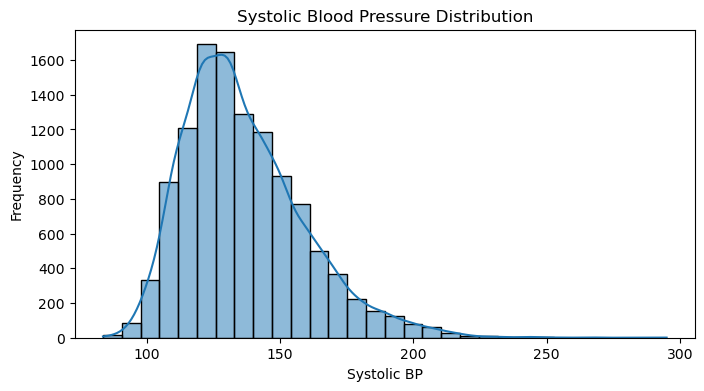

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


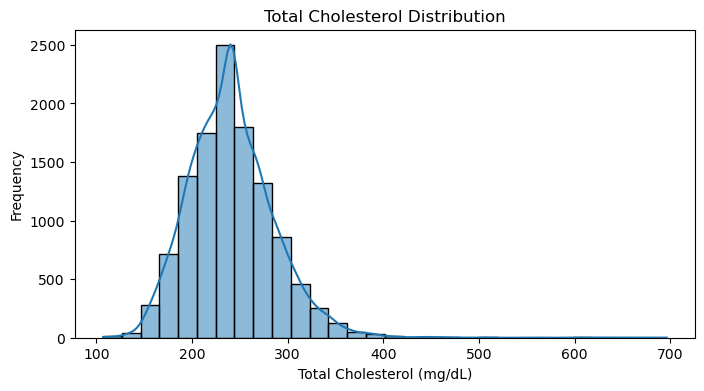

In [10]:
# Distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of systolic blood pressure
plt.figure(figsize=(8, 4))
sns.histplot(df['sysBP'], kde=True, bins=30)
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.show()

# Distribution of total cholesterol
plt.figure(figsize=(8, 4))
sns.histplot(df['totChol'], kde=True, bins=30)
plt.title('Total Cholesterol Distribution')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

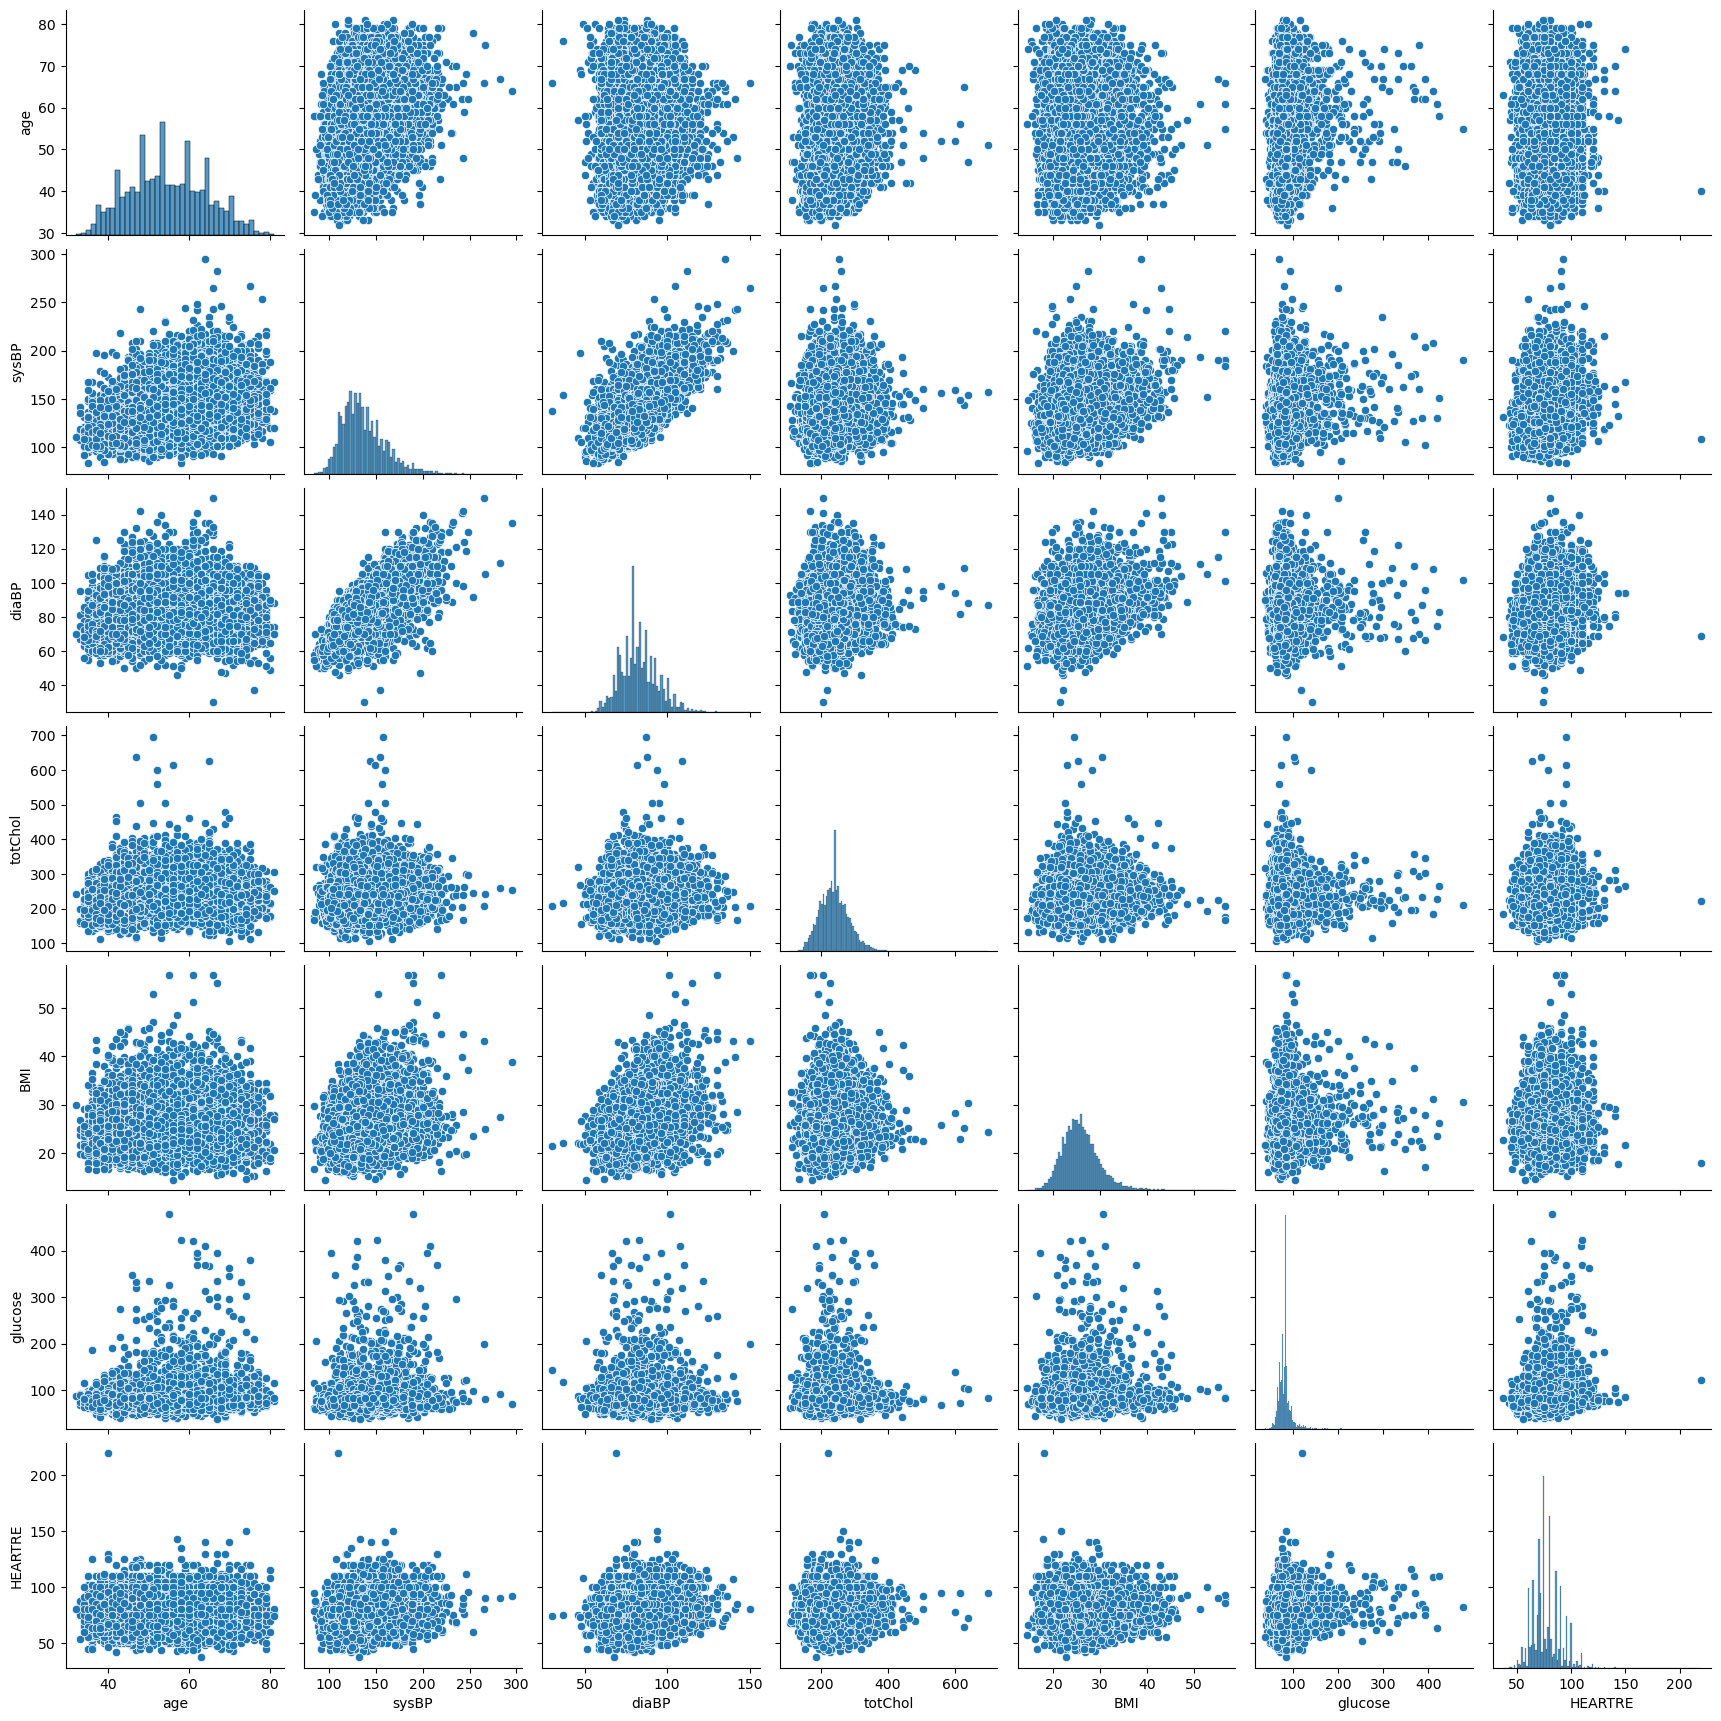

In [11]:
# Pair plot
sns.pairplot(df[['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'glucose', 'HEARTRE']])
plt.show()

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

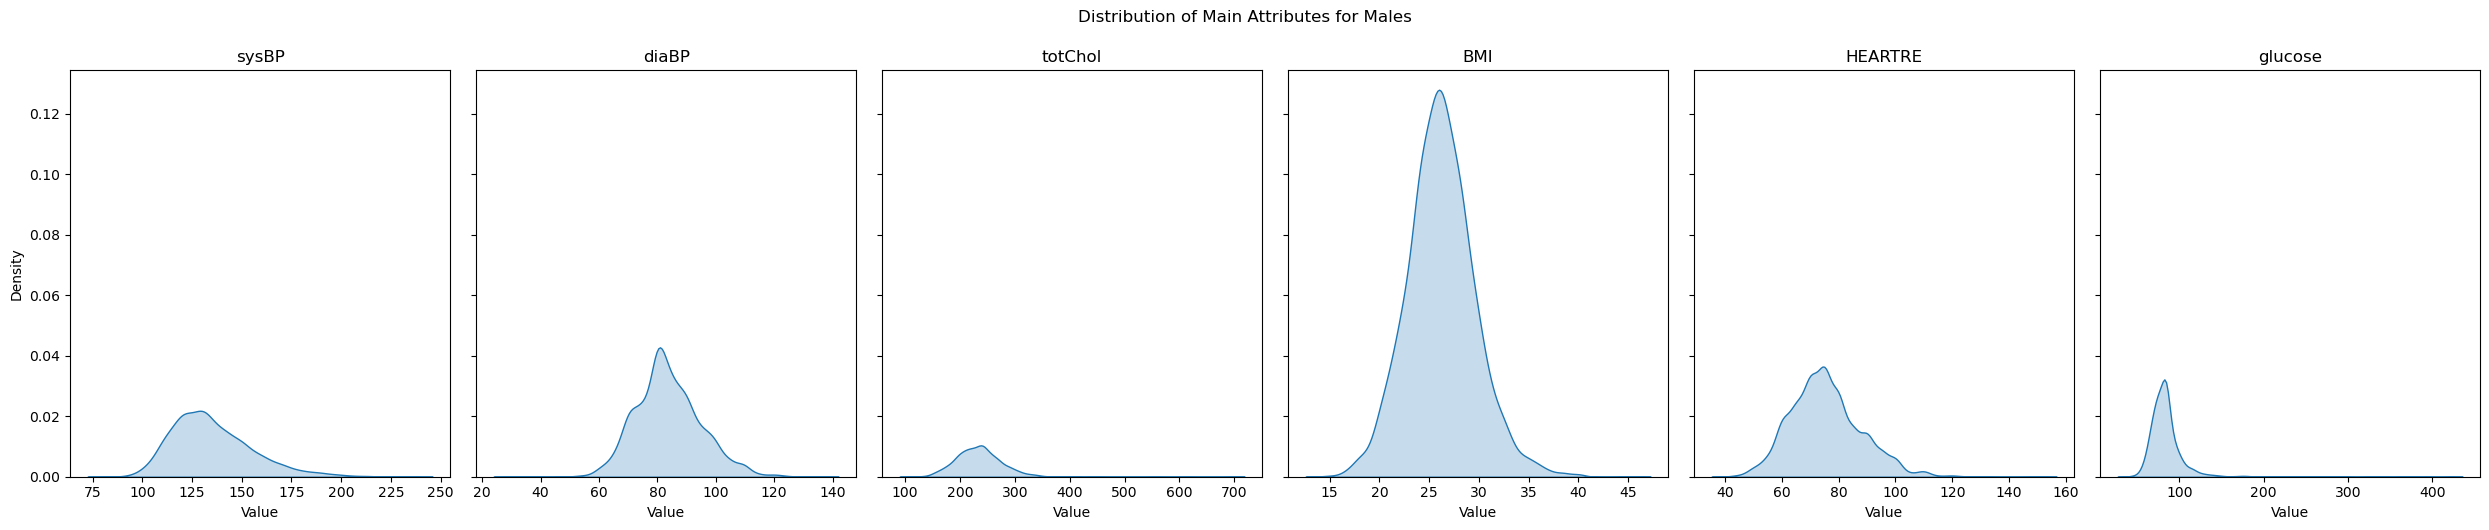

C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

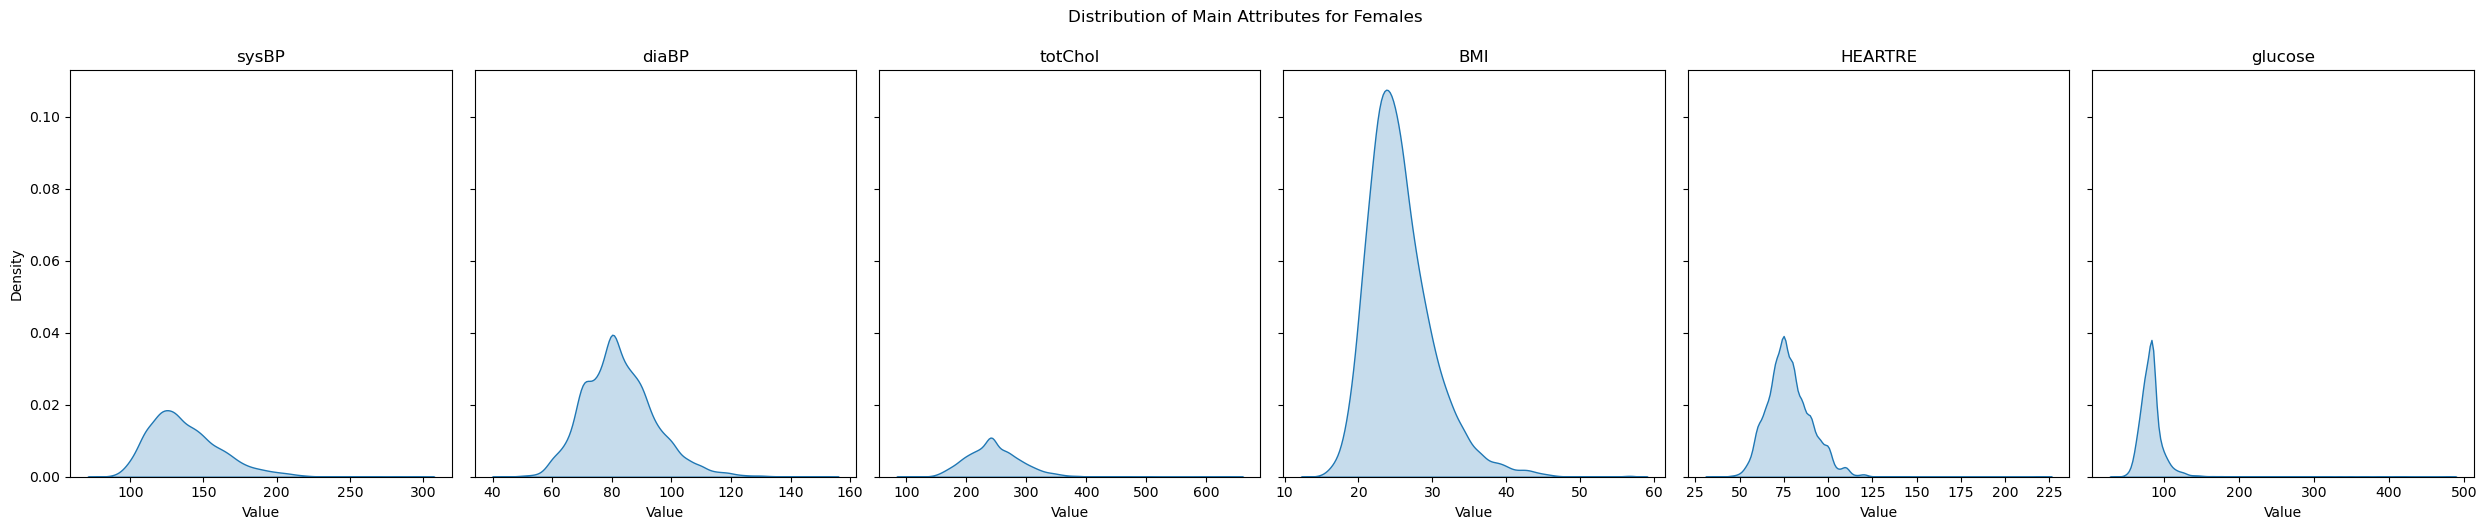

In [12]:
# Map numerical values to gender labels (assuming 1=Men and 2=Women based on typical encoding)
df['sex'] = df['sex'].map({1: 'Men', 2: 'Women'})  
    
# Filter the dataset to include only males
df_men = df[df['sex'] == 'Men']

# Define the main required attributes for the Framingham study
attributes = ['sysBP', 'diaBP', 'totChol', 'BMI', 'HEARTRE', 'glucose']

# Set up the figure and subplots for a single row of plots
fig, axes = plt.subplots(1, len(attributes), figsize=(25, 5), sharey=True)


# Create a KDE plot for each attribute
for ax, attribute in zip(axes, attributes):
    sns.kdeplot(df_men[attribute], fill=True, ax=ax)
    ax.set_title(attribute)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Distribution of Main Attributes for Males', y=1.05)
plt.show()


# Filter the dataset to include only females
df_women = df[df['sex'] == 'Women']


# Set up the figure and subplots for a single row of plots
fig, axes = plt.subplots(1, len(attributes), figsize=(25, 5), sharey=True)

# Create a KDE plot for each attribute
for ax, attribute in zip(axes, attributes):
    sns.kdeplot(df_women[attribute], fill=True, ax=ax)
    ax.set_title(attribute)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Distribution of Main Attributes for Females', y=1.05)
plt.show()

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1169025199.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['educ'].fillna(mode_educ, inplace=True)
C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1169025199.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_chd_prevalence = df.groupby('age_group')['TenYearFRS'].mean()

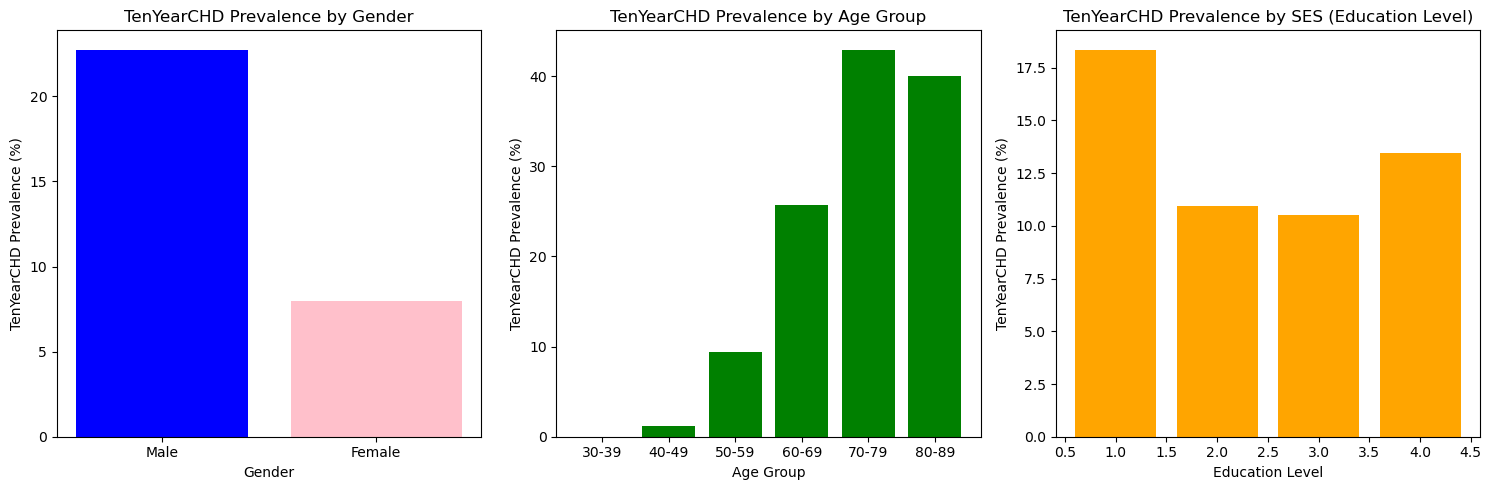

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Merin\Documents\FRS_Forumla.csv"
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['sex', 'age', 'educ', 'TenYearFRS']
df = data[columns_of_interest].copy()

# Fill missing 'educ' values with the mode
mode_educ = df['educ'].mode()[0]
df['educ'].fillna(mode_educ, inplace=True)

# Creating age groups
bins = [0, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# TenYearCHD Prevalence by Gender
gender_chd_prevalence = df.groupby('sex')['TenYearFRS'].mean().reset_index()
gender_chd_prevalence['TenYearFRS'] = gender_chd_prevalence['TenYearFRS'] * 100  # Convert to percentage
gender_chd_prevalence['sex'] = gender_chd_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# TenYearCHD Prevalence by Age Group
age_group_chd_prevalence = df.groupby('age_group')['TenYearFRS'].mean().reset_index()
age_group_chd_prevalence['TenYearFRS'] = age_group_chd_prevalence['TenYearFRS'] * 100  # Convert to percentage

# TenYearCHD Prevalence by Socio-Economic Status (SES)
ses_chd_prevalence = df.groupby('educ')['TenYearFRS'].mean().reset_index()
ses_chd_prevalence['TenYearFRS'] = ses_chd_prevalence['TenYearFRS'] * 100  # Convert to percentage

# Plotting the results
plt.figure(figsize=(15, 5))

# Plot TenYearCHD prevalence by gender
plt.subplot(1, 3, 1)
plt.bar(gender_chd_prevalence['sex'], gender_chd_prevalence['TenYearFRS'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by Gender')

# Plot TenYearCHD prevalence by age group
plt.subplot(1, 3, 2)
plt.bar(age_group_chd_prevalence['age_group'], age_group_chd_prevalence['TenYearFRS'], color='green')
plt.xlabel('Age Group')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by Age Group')

# Plot TenYearCHD prevalence by socio-economic status (SES)
plt.subplot(1, 3, 3)
plt.bar(ses_chd_prevalence['educ'], ses_chd_prevalence['TenYearFRS'], color='orange')
plt.xlabel('Education Level')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by SES (Education Level)')

plt.tight_layout()
plt.show()


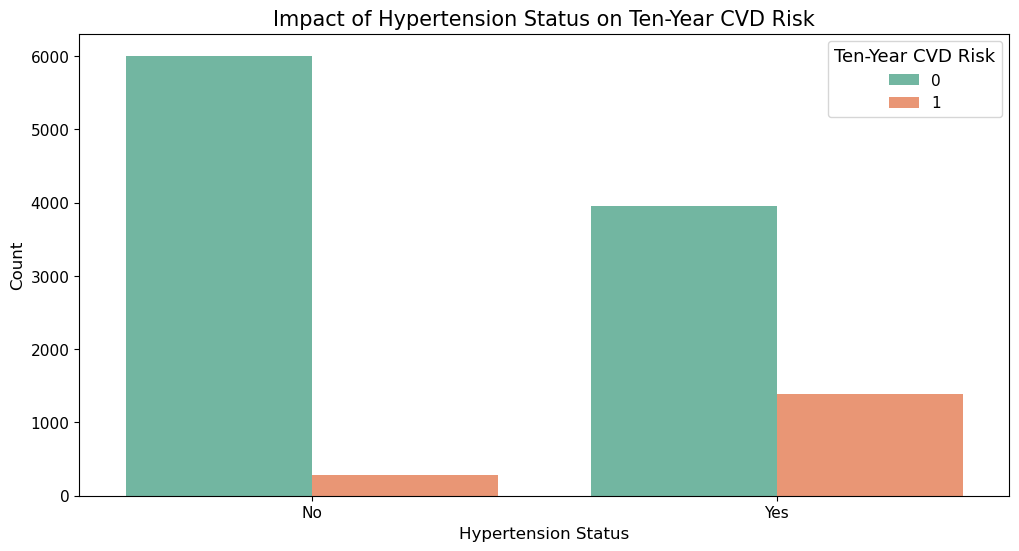

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1433626887.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=pairplot_data, x='totChol', hue='TenYearFRS', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a le

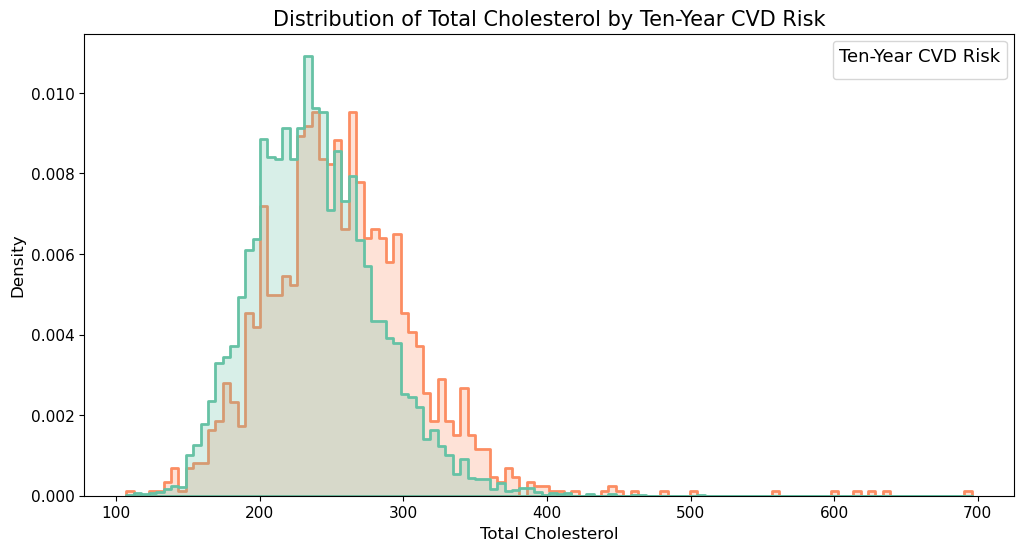

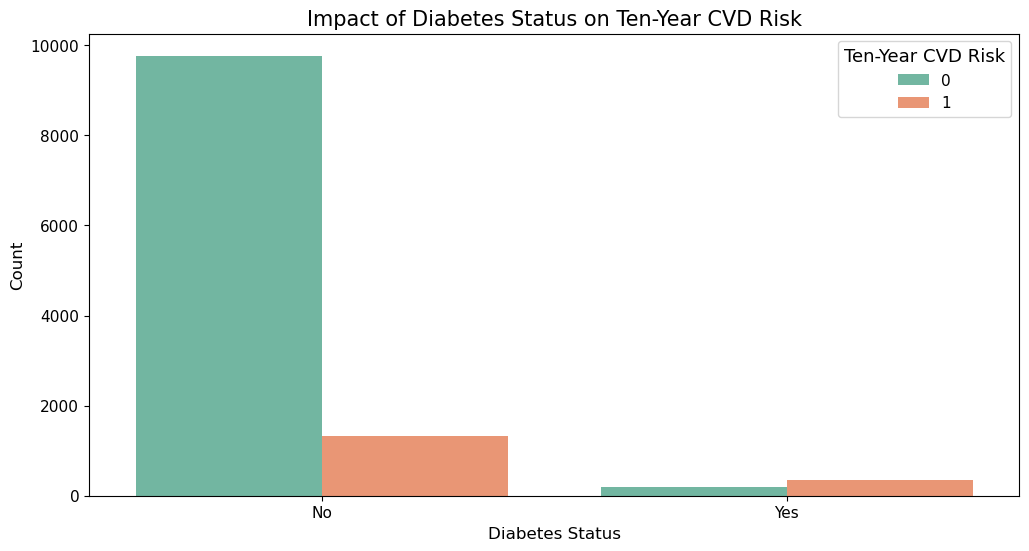

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1433626887.py:51: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=pairplot_data, x='glucose', hue='TenYearFRS', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a le

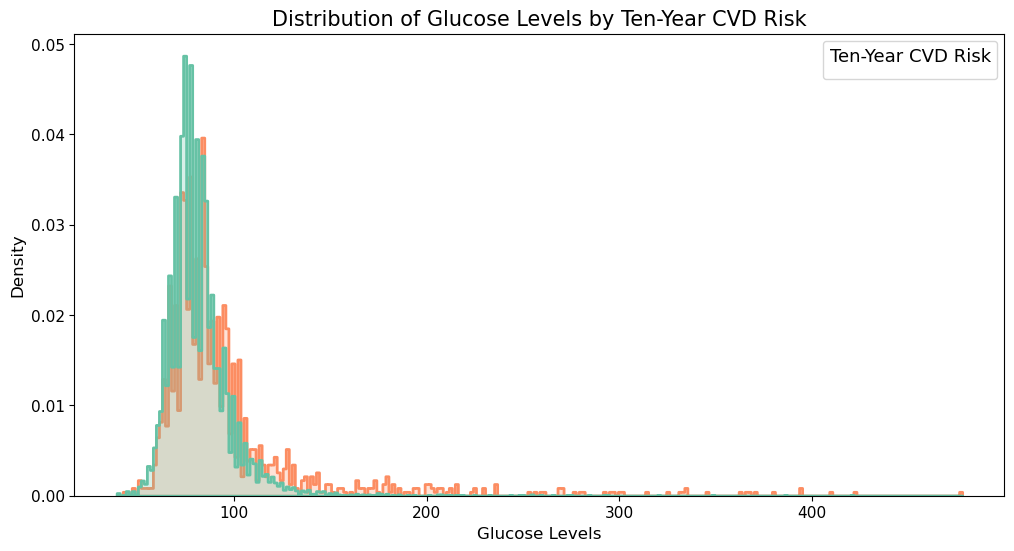

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\FRS_Forumla.csv"
data = pd.read_csv(file_path)

# Select only the relevant columns for analysis
columns_of_interest = ['PREVHYP', 'totChol', 'diabetes', 'glucose', 'TenYearFRS']
pairplot_data = data[columns_of_interest].copy()

# Define color palettes
color_palette = sns.color_palette("Set2")

# Hypertension status and TenYear_Score
plt.figure(figsize=(12, 6))
sns.countplot(data=pairplot_data, x='PREVHYP', hue='TenYearFRS', palette=color_palette)
plt.title('Impact of Hypertension Status on Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Hypertension Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# Total Cholesterol level and TenYear_Score
plt.figure(figsize=(12, 6))
sns.histplot(data=pairplot_data, x='totChol', hue='TenYearFRS', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
plt.title('Distribution of Total Cholesterol by Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Total Cholesterol', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.show()

# Diabetes status and TenYear_Score
plt.figure(figsize=(12, 6))
sns.countplot(data=pairplot_data, x='diabetes', hue='TenYearFRS', palette=color_palette)
plt.title('Impact of Diabetes Status on Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# Glucose levels and TenYear_Score
plt.figure(figsize=(12, 6))
sns.histplot(data=pairplot_data, x='glucose', hue='TenYearFRS', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
plt.title('Distribution of Glucose Levels by Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Glucose Levels', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.show()


C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\451685224.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].fillna(data['BMI'].mean(), inplace=True)
C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\451685224.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_da

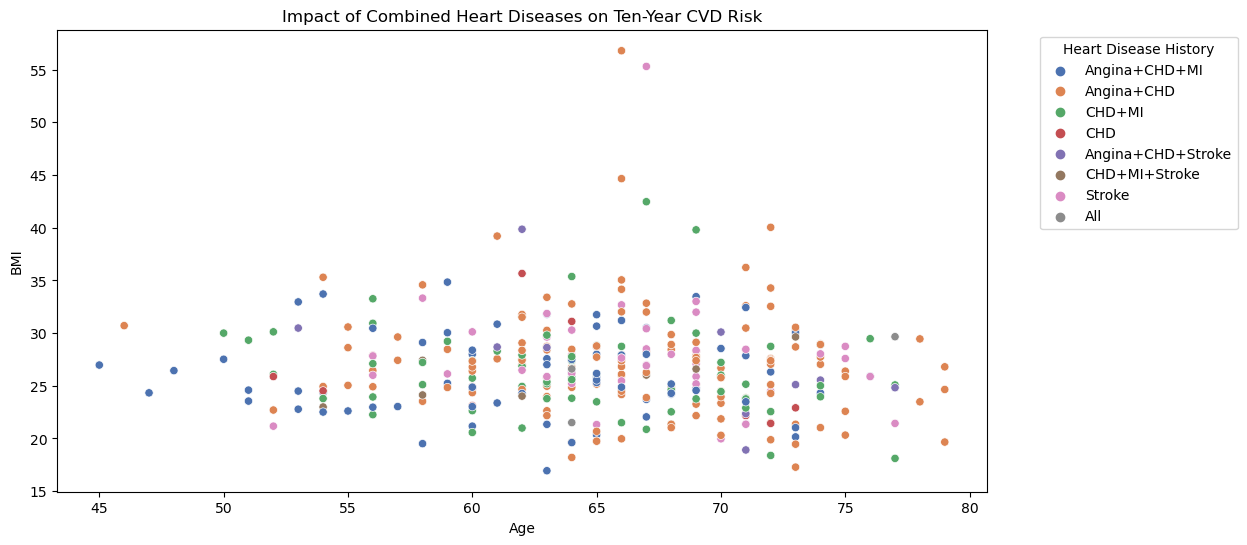

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\FRS_Forumla.csv"
data = pd.read_csv(file_path)

# Selecting relevant columns for analysis with original column names
columns_of_interest = [
    'age', 'BMI', 'PREVAP', 'PREVCHD', 'PREVMI', 'PREVSTRK', 'TenYearFRS'
]

# Handling missing values by filling with mean for numerical columns
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Creating a dataset for visualization
pairplot_data = data[columns_of_interest]
pairplot_data['TenYearFRS'] = pairplot_data['TenYearFRS'].map({0: 'No CVD', 1: 'CVD'})

# Filtering data where TenYearFRS is true (CVD)
cvd_data = pairplot_data[pairplot_data['TenYearFRS'] == 'CVD']

# Creating a combined column for heart disease history
cvd_data['HeartDiseaseHistory'] = (cvd_data['PREVAP'] + 
                                   2 * cvd_data['PREVCHD'] + 
                                   4 * cvd_data['PREVMI'] + 
                                   8 * cvd_data['PREVSTRK'])

# Filtering out rows where HeartDiseaseHistory is 0 (None)
cvd_data = cvd_data[cvd_data['HeartDiseaseHistory'] != 0]

# Mapping combined heart disease history to labels
cvd_data['HeartDiseaseHistory'] = cvd_data['HeartDiseaseHistory'].map({
    1: 'Angina',
    2: 'CHD',
    3: 'Angina+CHD',
    4: 'MI',
    5: 'Angina+MI',
    6: 'CHD+MI',
    7: 'Angina+CHD+MI',
    8: 'Stroke',
    9: 'Angina+Stroke',
    10: 'CHD+Stroke',
    11: 'Angina+CHD+Stroke',
    12: 'MI+Stroke',
    13: 'Angina+MI+Stroke',
    14: 'CHD+MI+Stroke',
    15: 'All'
})

# Scatter plot for combined heart diseases
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cvd_data, x='age', y='BMI', hue='HeartDiseaseHistory', palette='deep')
plt.title('Impact of Combined Heart Diseases on Ten-Year CVD Risk')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Heart Disease History', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


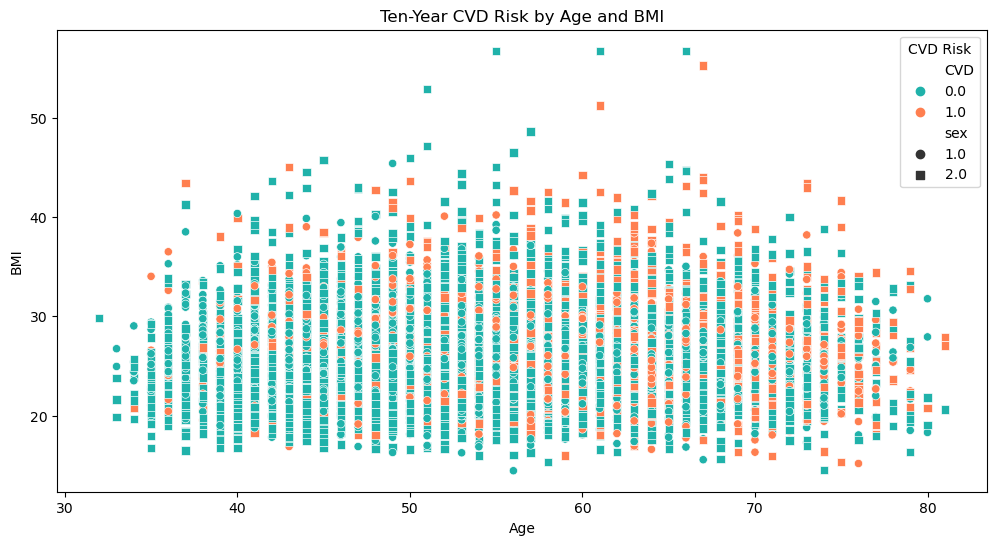

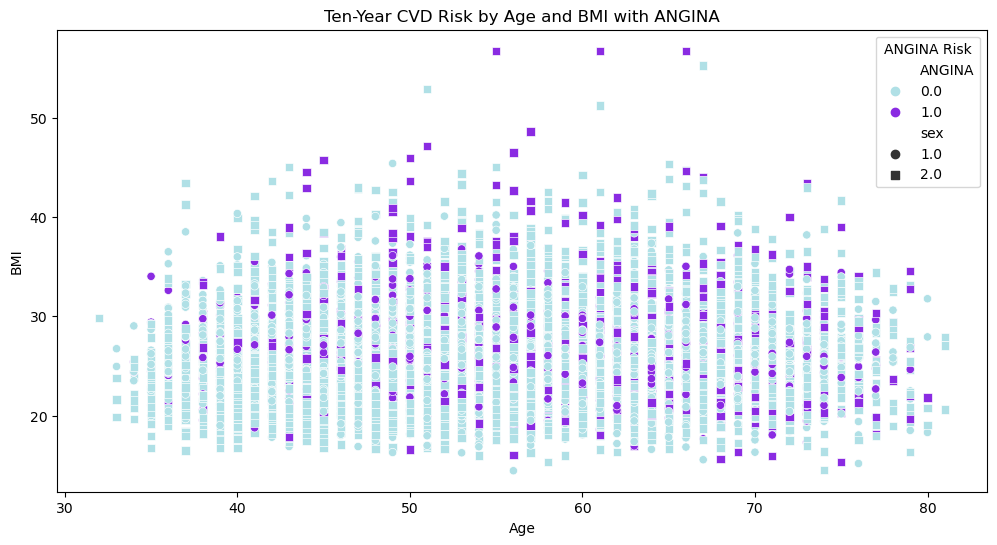

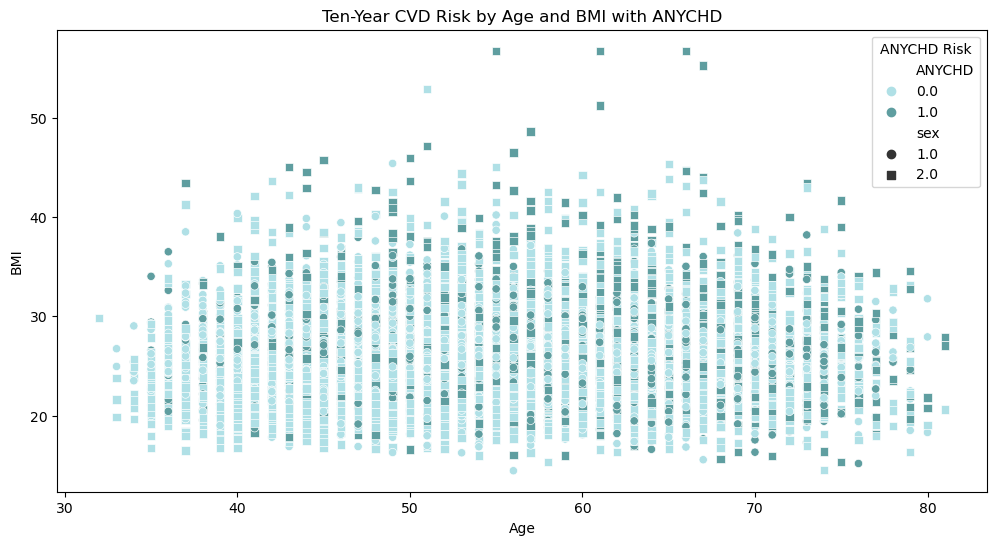

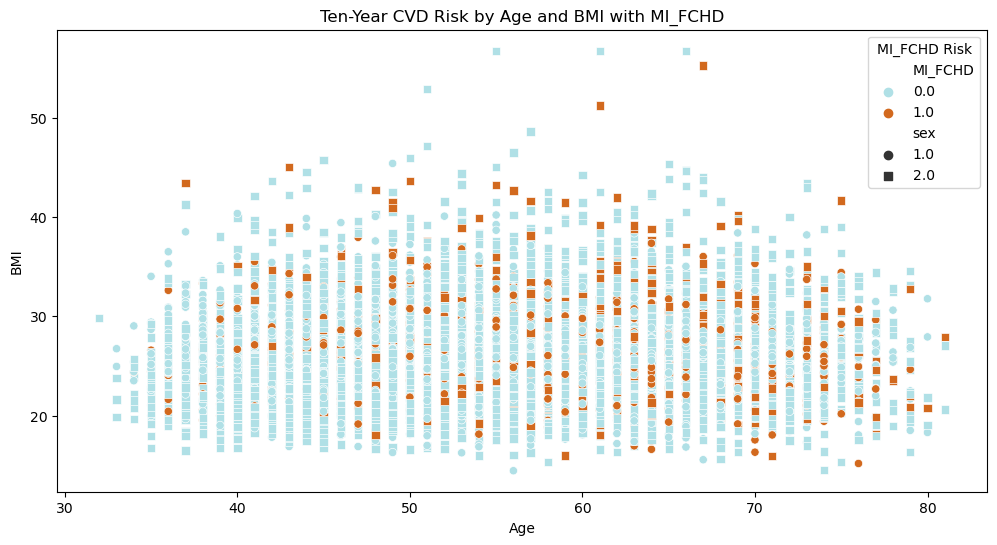

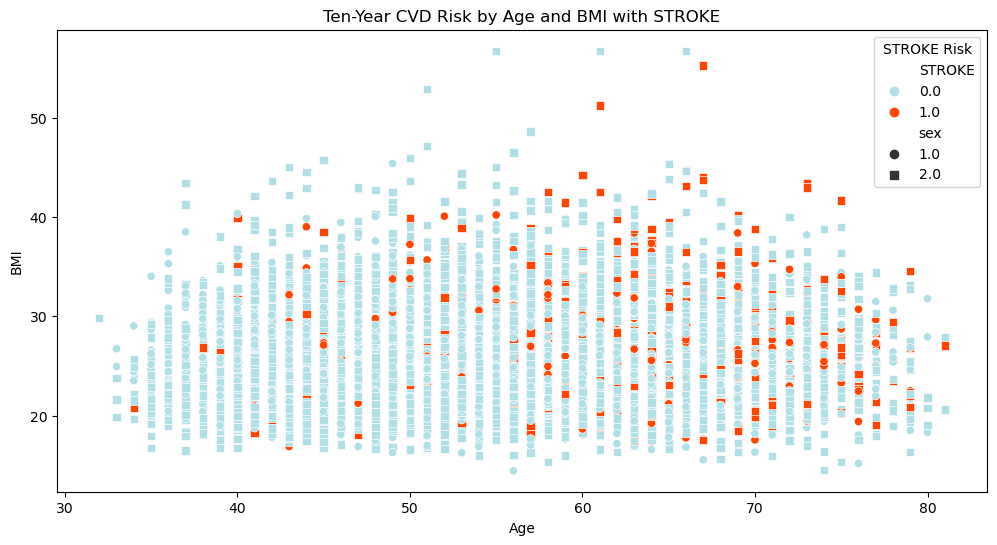

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Merin\Documents\FRS_Forumla.csv'
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['age', 'sex', 'BMI', 'TenYearFRS', 'DEATH', 'CVD', 'ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
df = data[columns_of_interest].copy()

# Visualizing Ten-Year CVD Risk by Age and BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='BMI', hue='CVD', style='sex', data=df, palette=['#20B2AA', '#FF7F50'], markers=['o', 's'])
plt.title('Ten-Year CVD Risk by Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='CVD Risk')
plt.show()

# Visualizing specific conditions
conditions = ['ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
titles = ['Angina', 'CHD', 'MI', 'Stroke']
colors = ['#8A2BE2', '#5F9EA0', '#D2691E', '#FF4500']


# Scatter plot for age, BMI, and specific conditions
for condition, color in zip(conditions, colors):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='age', y='BMI', hue=condition, style='sex', data=df, palette=['#B0E0E6', color], markers=['o', 's'])
    plt.title(f'Ten-Year CVD Risk by Age and BMI with {condition}')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend(title=f'{condition} Risk')
    plt.show()


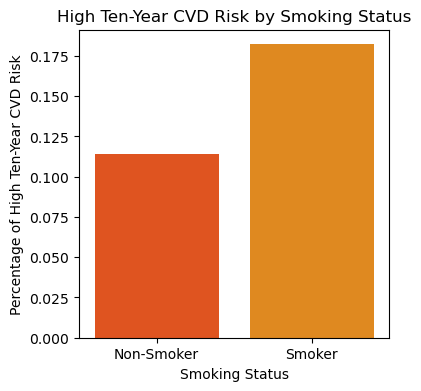

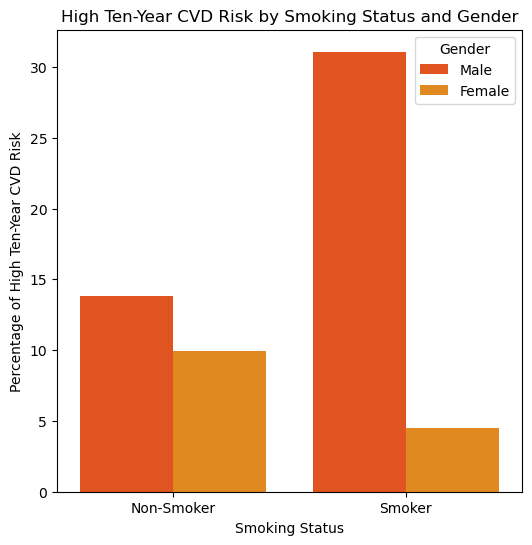

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\FRS_Forumla.csv"
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['sex','CURSMOKE', 'TenYearFRS']
df = data[columns_of_interest].copy()

# Calculate the prevalence of TenYear_Score (high risk) by smoking status
smoking_status_prevalence = df.groupby('CURSMOKE')['TenYearFRS'].mean().reset_index()
smoking_status_prevalence['TenYear_Score'] = smoking_status_prevalence['TenYearFRS'] * 100  # Convert to percentage
smoking_status_prevalence['CURSMOKE'] = smoking_status_prevalence['CURSMOKE'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Plotting the results
plt.figure(figsize=(4, 4))
sns.barplot(x='CURSMOKE', y='TenYearFRS', data=smoking_status_prevalence, palette=['#FF4500', '#FF8C00'])
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by Smoking Status')
plt.show()


# Calculate the prevalence of TenYear_Score (high risk) by smoking status and gender
gender_smoking_status_prevalence = df.groupby(['sex', 'CURSMOKE'])['TenYearFRS'].mean().reset_index()
gender_smoking_status_prevalence['TenYearFRS'] = gender_smoking_status_prevalence['TenYearFRS'] * 100  # Convert to percentage
gender_smoking_status_prevalence['CURSMOKE'] = gender_smoking_status_prevalence['CURSMOKE'].map({0: 'Non-Smoker', 1: 'Smoker'})
gender_smoking_status_prevalence['sex'] = gender_smoking_status_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# Plotting the results
plt.figure(figsize=(6, 6))
sns.barplot(x='CURSMOKE', y='TenYearFRS', hue='sex', data=gender_smoking_status_prevalence, palette=['#FF4500', '#FF8C00'])
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by Smoking Status and Gender')
plt.legend(title='Gender')
plt.show()


C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2791528931.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_risk_prevalence = df.groupby('BMI_Category')['TenYearFRS'].mean().reset_index()
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


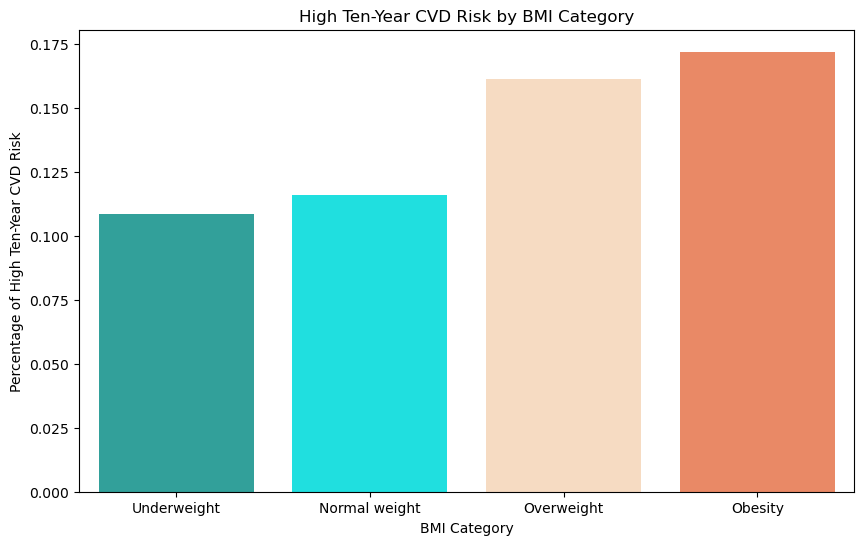

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2791528931.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_gender_risk_prevalence = df.groupby(['BMI_Category', 'sex'])['TenYearFRS'].mean().reset_index()
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

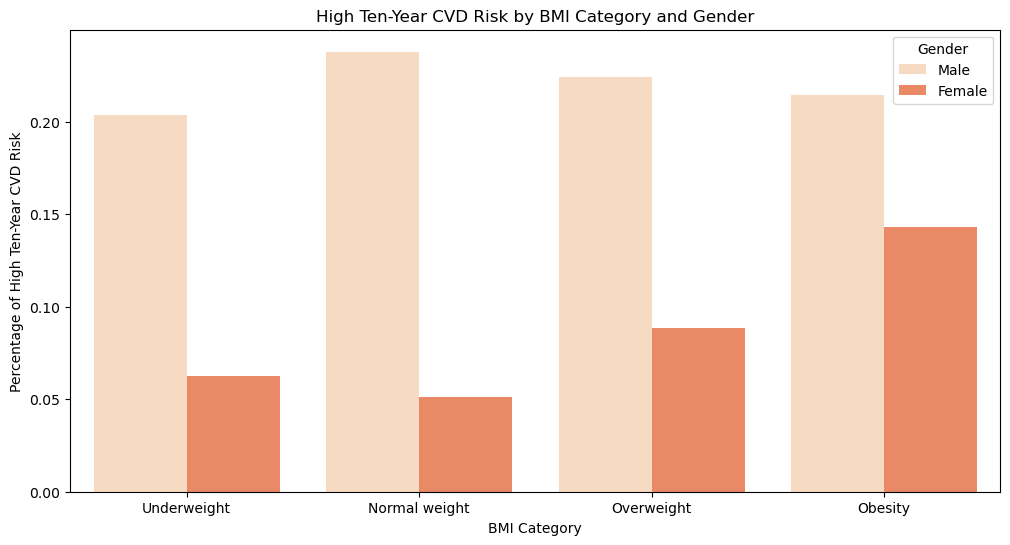

In [18]:
# Select relevant columns for the analysis
columns_of_interest = ['sex', 'BMI', 'TenYearFRS']
df = data[columns_of_interest].copy()

# Define BMI categories without 'Severe obesity'
bins = [0, 18.5, 24.9, 29.9, 39.9]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Calculate the prevalence of TenYear_Score (high risk) by BMI category
bmi_risk_prevalence = df.groupby('BMI_Category')['TenYearFRS'].mean().reset_index()
bmi_risk_prevalence['TenYearCHD'] = bmi_risk_prevalence['TenYearFRS'] * 100  # Convert to percentage

# Bar plot for TenYear_Score by BMI category
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='TenYearFRS', data=bmi_risk_prevalence, palette=['#20B2AA', '#00FFFF', '#FFDAB9', '#FF7F50'])
plt.xlabel('BMI Category')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by BMI Category')
plt.show()

# Calculate the prevalence of TenYear_Score (high risk) by BMI category and gender
bmi_gender_risk_prevalence = df.groupby(['BMI_Category', 'sex'])['TenYearFRS'].mean().reset_index()
bmi_gender_risk_prevalence['TenYearCHD'] = bmi_gender_risk_prevalence['TenYearFRS'] * 100  # Convert to percentage
bmi_gender_risk_prevalence['sex'] = bmi_gender_risk_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# Bar plot for TenYear_Score by BMI category and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='BMI_Category', y='TenYearFRS', hue='sex', data=bmi_gender_risk_prevalence, palette=['#FFDAB9', '#FF7F50'])
plt.xlabel('BMI Category')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by BMI Category and Gender')
plt.legend(title='Gender')
plt.show()

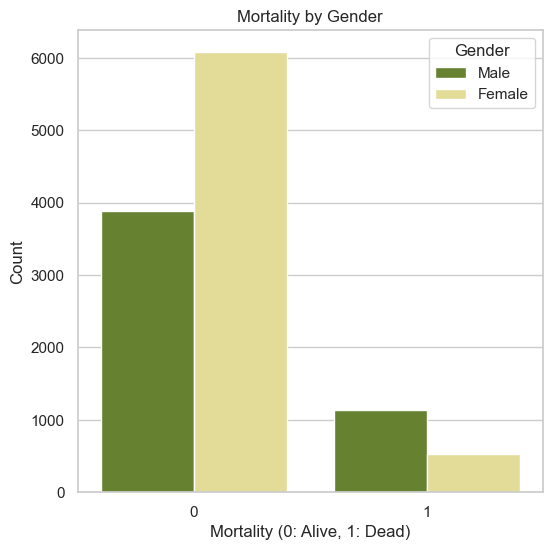

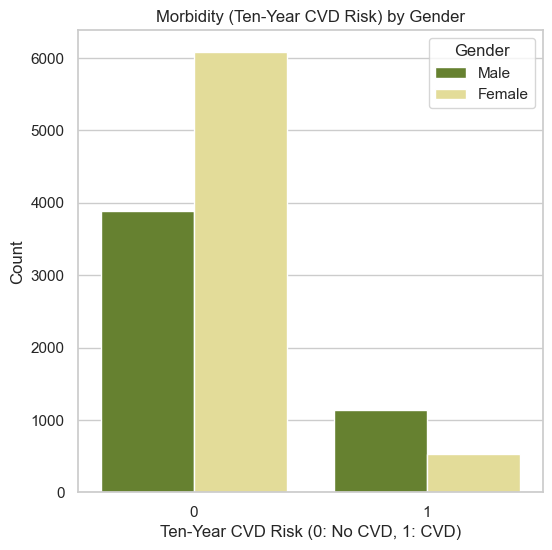

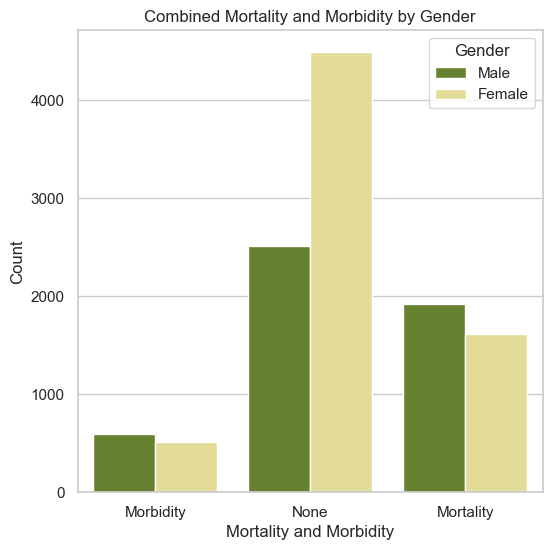

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Merin\Documents\FRS_Forumla.csv'
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['age', 'sex', 'BMI', 'TenYearFRS', 'DEATH', 'CVD', 'ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
df = data[columns_of_interest].copy()

# Convert relevant columns to appropriate data types
df['sex'] = df['sex'].astype(int)
df['DEATH'] = df['DEATH'].astype(int)
df['CVD'] = df['CVD'].astype(int)
df['ANGINA'] = df['ANGINA'].astype(int)
df['ANYCHD'] = df['ANYCHD'].astype(int)
df['MI_FCHD'] = df['MI_FCHD'].astype(int)
df['STROKE'] = df['STROKE'].astype(int)

# Map sex to readable labels
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})

# Plot settings
sns.set(style="whitegrid")

# Visualizing mortality
plt.figure(figsize=(6, 6))
sns.countplot(x='TenYearFRS', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Mortality by Gender')
plt.xlabel('Mortality (0: Alive, 1: Dead)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Visualizing morbidity (Ten-Year CVD Risk)
plt.figure(figsize=(6, 6))
sns.countplot(x='TenYearFRS', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Morbidity (Ten-Year CVD Risk) by Gender')
plt.xlabel('Ten-Year CVD Risk (0: No CVD, 1: CVD)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Creating a combined column for mortality and morbidity
df['Mortality_Morbidity'] = df.apply(lambda row: 'Mortality' if row['DEATH'] == 1 else ('Morbidity' if row['CVD'] == 1 else 'None'), axis=1)

# Visualizing combined mortality and morbidity
plt.figure(figsize=(6, 6))
sns.countplot(x='Mortality_Morbidity', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Combined Mortality and Morbidity by Gender')
plt.xlabel('Mortality and Morbidity')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



for score

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2185980923.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['educ'].fillna(mode_educ, inplace=True)
C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2185980923.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_chd_prevalence = df.groupby('age_group')['PredictedTenYearSco

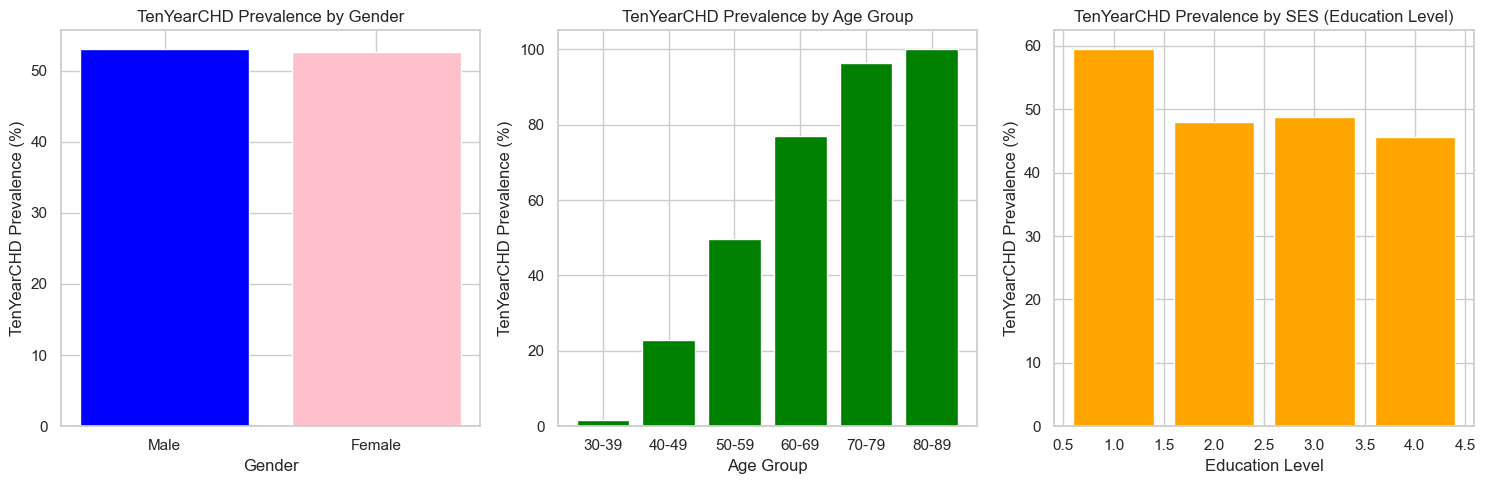

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Merin\Documents\Score_Forumla.csv"
data = pd.read_csv(file_path)


# Select relevant columns for the analysis
columns_of_interest = ['sex', 'age', 'educ', 'PredictedTenYearScore']
df = data[columns_of_interest].copy()

# Fill missing 'educ' values with the mode
mode_educ = df['educ'].mode()[0]
df['educ'].fillna(mode_educ, inplace=True)

# Creating age groups
bins = [0, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# TenYearCHD Prevalence by Gender
gender_chd_prevalence = df.groupby('sex')['PredictedTenYearScore'].mean().reset_index()
gender_chd_prevalence['PredictedTenYearScore'] = gender_chd_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage
gender_chd_prevalence['sex'] = gender_chd_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# TenYearCHD Prevalence by Age Group
age_group_chd_prevalence = df.groupby('age_group')['PredictedTenYearScore'].mean().reset_index()
age_group_chd_prevalence['PredictedTenYearScore'] = age_group_chd_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage

# TenYearCHD Prevalence by Socio-Economic Status (SES)
ses_chd_prevalence = df.groupby('educ')['PredictedTenYearScore'].mean().reset_index()
ses_chd_prevalence['PredictedTenYearScore'] = ses_chd_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage

# Plotting the results
plt.figure(figsize=(15, 5))

# Plot TenYearCHD prevalence by gender
plt.subplot(1, 3, 1)
plt.bar(gender_chd_prevalence['sex'], gender_chd_prevalence['PredictedTenYearScore'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by Gender')

# Plot TenYearCHD prevalence by age group
plt.subplot(1, 3, 2)
plt.bar(age_group_chd_prevalence['age_group'], age_group_chd_prevalence['PredictedTenYearScore'], color='green')
plt.xlabel('Age Group')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by Age Group')

# Plot TenYearCHD prevalence by socio-economic status (SES)
plt.subplot(1, 3, 3)
plt.bar(ses_chd_prevalence['educ'], ses_chd_prevalence['PredictedTenYearScore'], color='orange')
plt.xlabel('Education Level')
plt.ylabel('TenYearCHD Prevalence (%)')
plt.title('TenYearCHD Prevalence by SES (Education Level)')

plt.tight_layout()
plt.show()

#Balanced Risk: The equal prevalence rates suggest that gender does not significantly influence the ten-year
#risk of CHD in the population represented by the dataset.

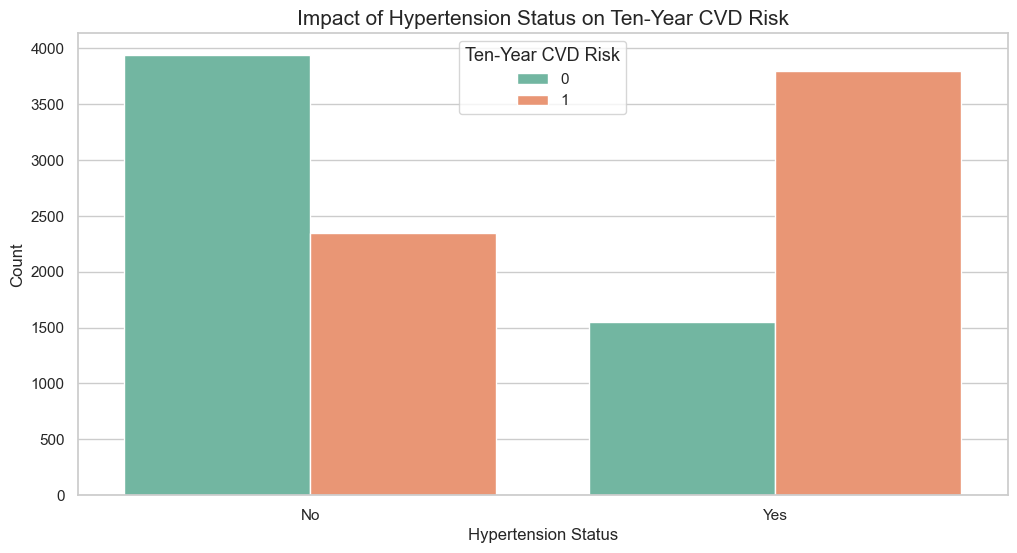

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\176285598.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=pairplot_data, x='totChol', hue='PredictedTenYearScore', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping

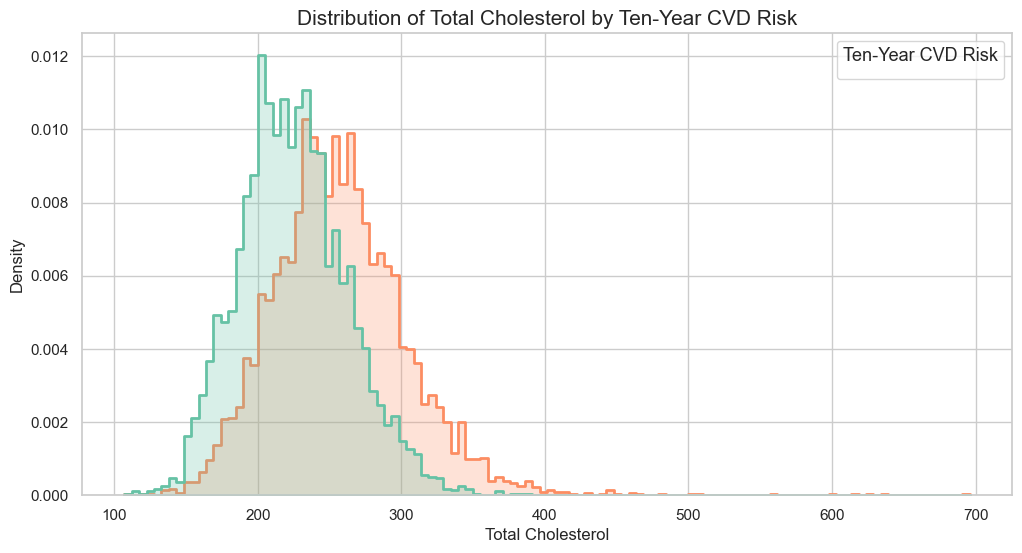

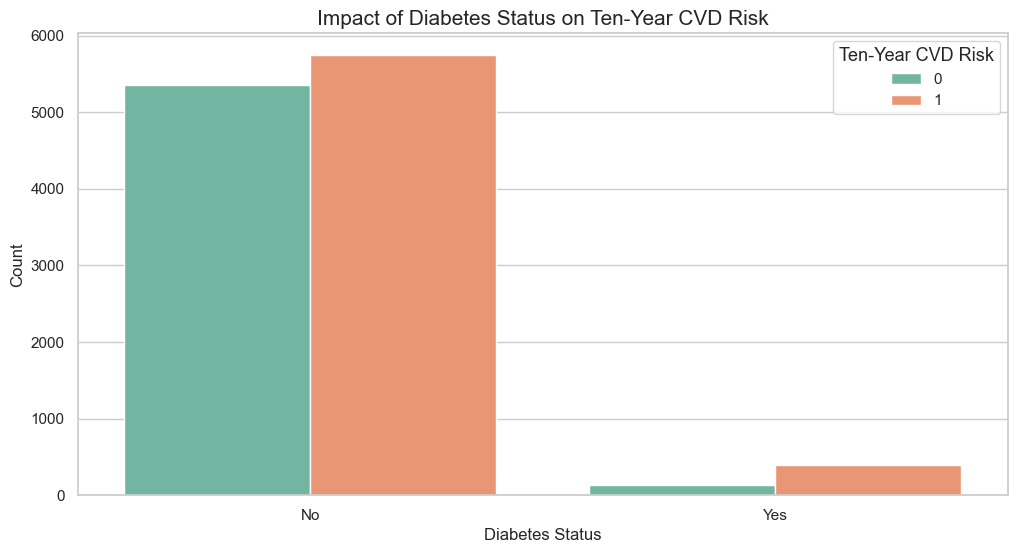

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\176285598.py:51: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=pairplot_data, x='glucose', hue='PredictedTenYearScore', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping

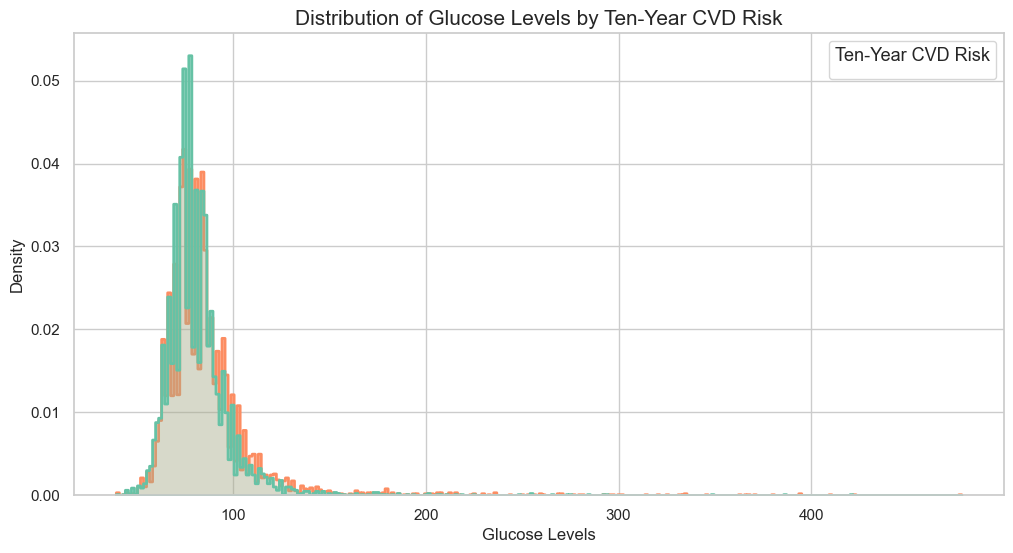

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\Score_Forumla.csv"
data = pd.read_csv(file_path)

# Select only the relevant columns for analysis
columns_of_interest = ['PREVHYP', 'totChol', 'diabetes', 'glucose', 'PredictedTenYearScore']
pairplot_data = data[columns_of_interest].copy()

# Define color palettes
color_palette = sns.color_palette("Set2")

# Hypertension status and TenYear_Score
plt.figure(figsize=(12, 6))
sns.countplot(data=pairplot_data, x='PREVHYP', hue='PredictedTenYearScore', palette=color_palette)
plt.title('Impact of Hypertension Status on Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Hypertension Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# Total Cholesterol level and TenYear_Score
plt.figure(figsize=(12, 6))
sns.histplot(data=pairplot_data, x='totChol', hue='PredictedTenYearScore', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
plt.title('Distribution of Total Cholesterol by Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Total Cholesterol', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.show()

# Diabetes status and TenYear_Score
plt.figure(figsize=(12, 6))
sns.countplot(data=pairplot_data, x='diabetes', hue='PredictedTenYearScore', palette=color_palette)
plt.title('Impact of Diabetes Status on Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# Glucose levels and TenYear_Score
plt.figure(figsize=(12, 6))
sns.histplot(data=pairplot_data, x='glucose', hue='PredictedTenYearScore', element='step', stat='density', common_norm=False, palette=color_palette, linewidth=2)
plt.title('Distribution of Glucose Levels by Ten-Year CVD Risk', fontsize=15)
plt.xlabel('Glucose Levels', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Ten-Year CVD Risk', title_fontsize='13', fontsize='11')
plt.show()


C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1699480228.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].fillna(data['BMI'].mean(), inplace=True)
C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\1699480228.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_

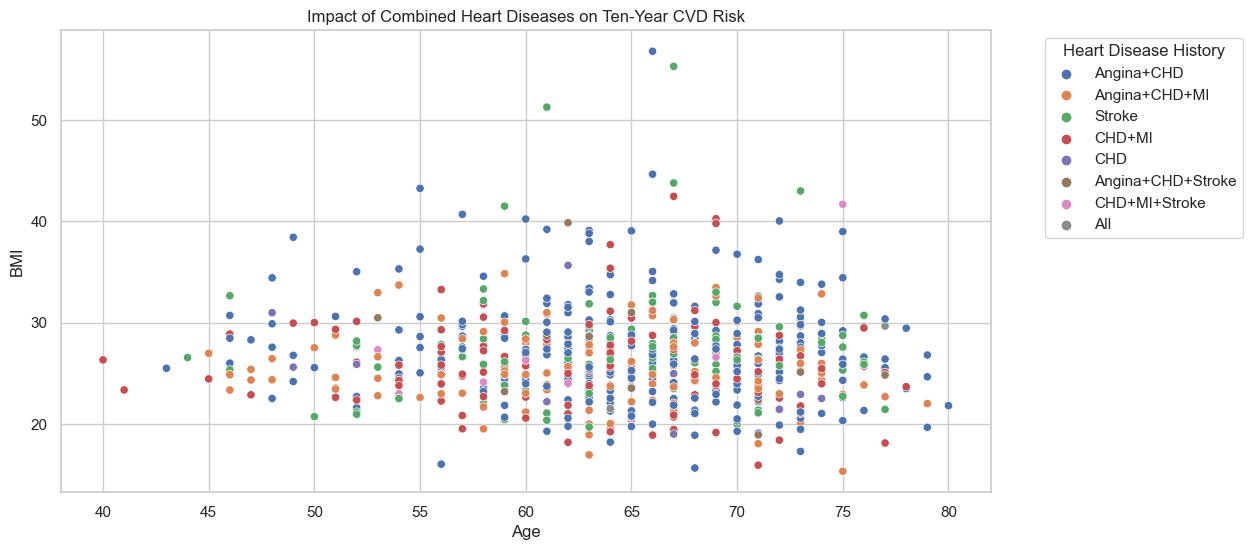

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\Score_Forumla.csv"
data = pd.read_csv(file_path)

# Selecting relevant columns for analysis with original column names
columns_of_interest = [
    'age', 'BMI', 'PREVAP', 'PREVCHD', 'PREVMI', 'PREVSTRK', 'PredictedTenYearScore'
]

# Handling missing values by filling with mean for numerical columns
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Creating a dataset for visualization
pairplot_data = data[columns_of_interest]
pairplot_data['PredictedTenYearScore'] = pairplot_data['PredictedTenYearScore'].map({0: 'No CVD', 1: 'CVD'})

# Filtering data where TenYearFRS is true (CVD)
cvd_data = pairplot_data[pairplot_data['PredictedTenYearScore'] == 'CVD']

# Creating a combined column for heart disease history
cvd_data['HeartDiseaseHistory'] = (cvd_data['PREVAP'] + 
                                   2 * cvd_data['PREVCHD'] + 
                                   4 * cvd_data['PREVMI'] + 
                                   8 * cvd_data['PREVSTRK'])

# Filtering out rows where HeartDiseaseHistory is 0 (None)
cvd_data = cvd_data[cvd_data['HeartDiseaseHistory'] != 0]

# Mapping combined heart disease history to labels
cvd_data['HeartDiseaseHistory'] = cvd_data['HeartDiseaseHistory'].map({
    1: 'Angina',
    2: 'CHD',
    3: 'Angina+CHD',
    4: 'MI',
    5: 'Angina+MI',
    6: 'CHD+MI',
    7: 'Angina+CHD+MI',
    8: 'Stroke',
    9: 'Angina+Stroke',
    10: 'CHD+Stroke',
    11: 'Angina+CHD+Stroke',
    12: 'MI+Stroke',
    13: 'Angina+MI+Stroke',
    14: 'CHD+MI+Stroke',
    15: 'All'
})

# Scatter plot for combined heart diseases
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cvd_data, x='age', y='BMI', hue='HeartDiseaseHistory', palette='deep')
plt.title('Impact of Combined Heart Diseases on Ten-Year CVD Risk')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Heart Disease History', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


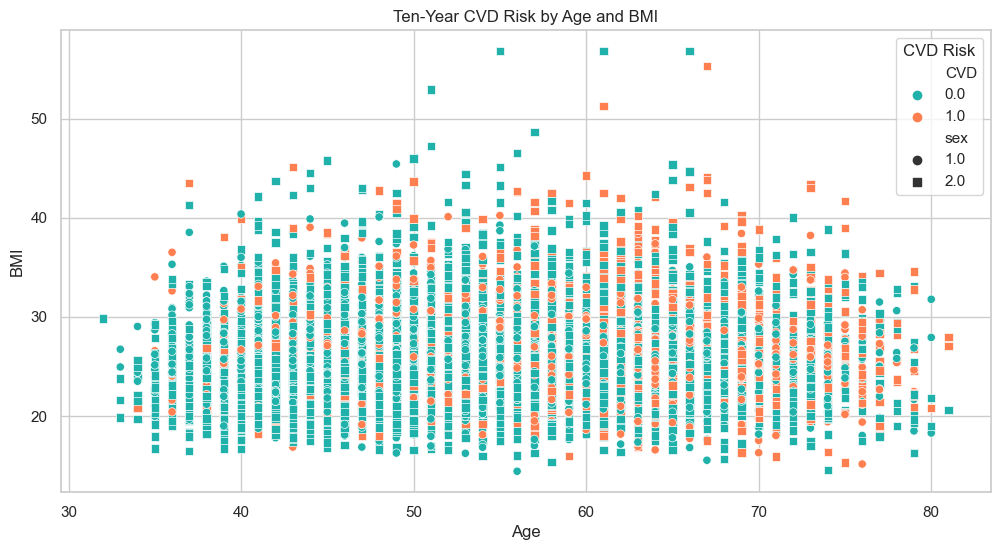

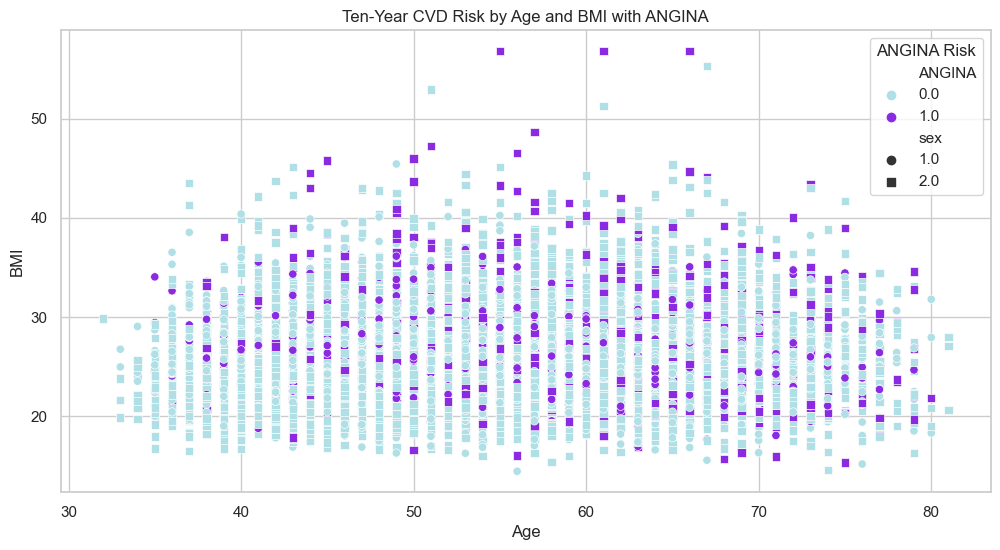

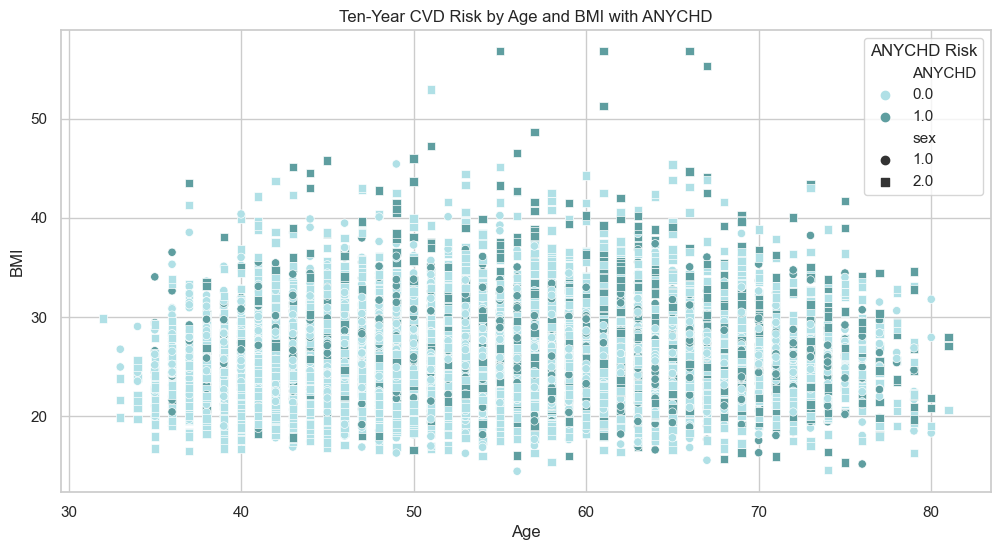

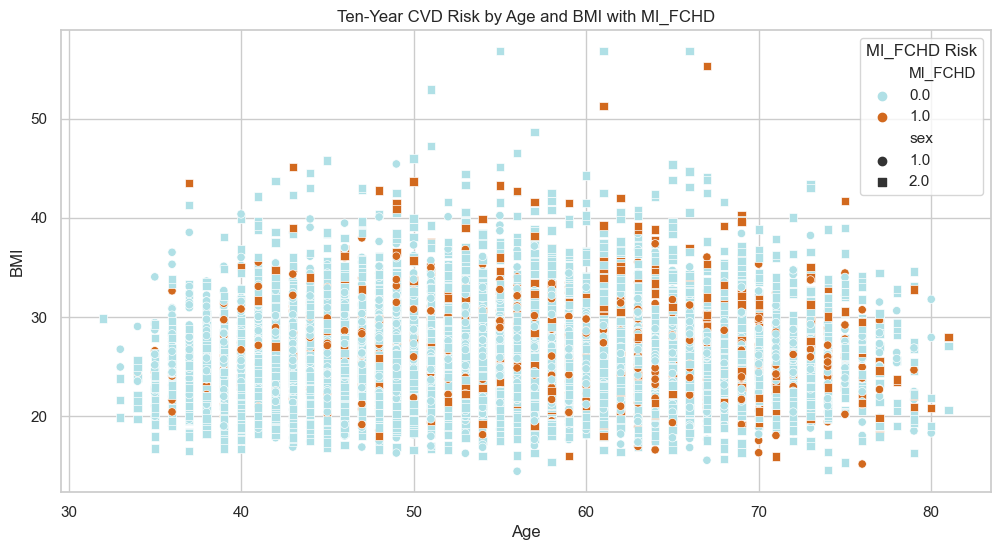

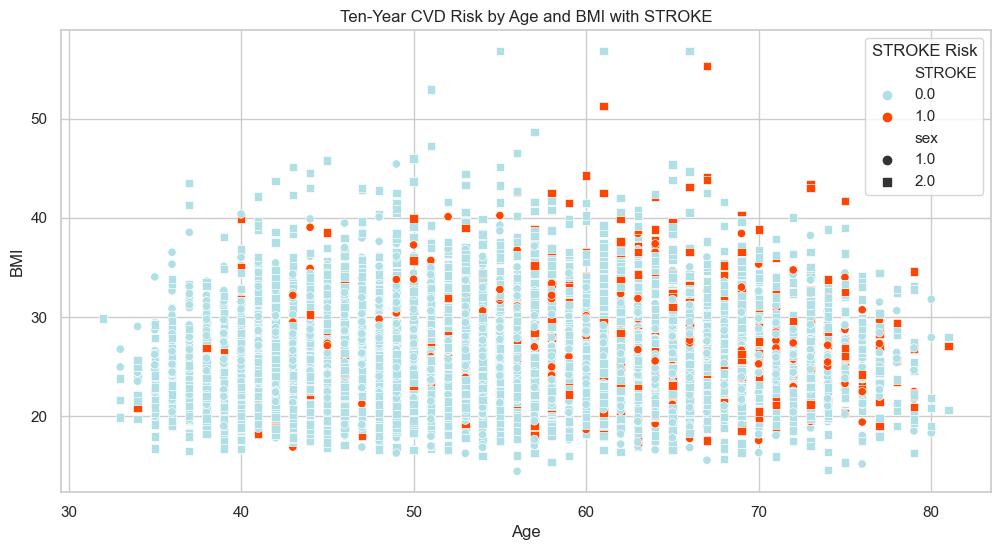

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Merin\Documents\Score_Forumla.csv'
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['age', 'sex', 'BMI', 'PredictedTenYearScore', 'DEATH', 'CVD', 'ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
df = data[columns_of_interest].copy()

# Visualizing Ten-Year CVD Risk by Age and BMI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='BMI', hue='CVD', style='sex', data=df, palette=['#20B2AA', '#FF7F50'], markers=['o', 's'])
plt.title('Ten-Year CVD Risk by Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='CVD Risk')
plt.show()

# Visualizing specific conditions
conditions = ['ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
titles = ['Angina', 'CHD', 'MI', 'Stroke']
colors = ['#8A2BE2', '#5F9EA0', '#D2691E', '#FF4500']


# Scatter plot for age, BMI, and specific conditions
for condition, color in zip(conditions, colors):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='age', y='BMI', hue=condition, style='sex', data=df, palette=['#B0E0E6', color], markers=['o', 's'])
    plt.title(f'Ten-Year CVD Risk by Age and BMI with {condition}')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend(title=f'{condition} Risk')
    plt.show()


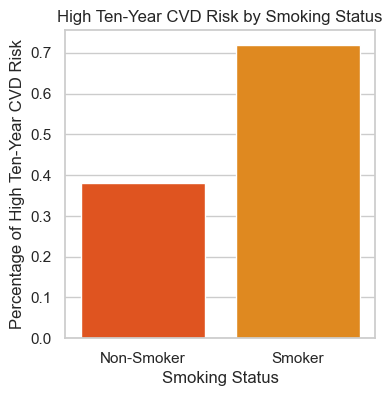

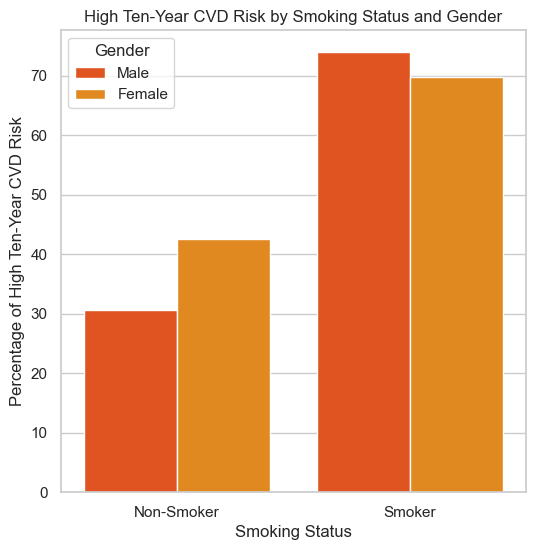

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Merin\Documents\Score_Forumla.csv"
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['sex','CURSMOKE', 'PredictedTenYearScore']
df = data[columns_of_interest].copy()

# Calculate the prevalence of TenYear_Score (high risk) by smoking status
smoking_status_prevalence = df.groupby('CURSMOKE')['PredictedTenYearScore'].mean().reset_index()
smoking_status_prevalence['TenYear_Score'] = smoking_status_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage
smoking_status_prevalence['CURSMOKE'] = smoking_status_prevalence['CURSMOKE'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Plotting the results
plt.figure(figsize=(4, 4))
sns.barplot(x='CURSMOKE', y='PredictedTenYearScore', data=smoking_status_prevalence, palette=['#FF4500', '#FF8C00'])
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by Smoking Status')
plt.show()


# Calculate the prevalence of TenYear_Score (high risk) by smoking status and gender
gender_smoking_status_prevalence = df.groupby(['sex', 'CURSMOKE'])['PredictedTenYearScore'].mean().reset_index()
gender_smoking_status_prevalence['PredictedTenYearScore'] = gender_smoking_status_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage
gender_smoking_status_prevalence['CURSMOKE'] = gender_smoking_status_prevalence['CURSMOKE'].map({0: 'Non-Smoker', 1: 'Smoker'})
gender_smoking_status_prevalence['sex'] = gender_smoking_status_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# Plotting the results
plt.figure(figsize=(6, 6))
sns.barplot(x='CURSMOKE', y='PredictedTenYearScore', hue='sex', data=gender_smoking_status_prevalence, palette=['#FF4500', '#FF8C00'])
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by Smoking Status and Gender')
plt.legend(title='Gender')
plt.show()


C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2386406986.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_risk_prevalence = df.groupby('BMI_Category')['PredictedTenYearScore'].mean().reset_index()
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


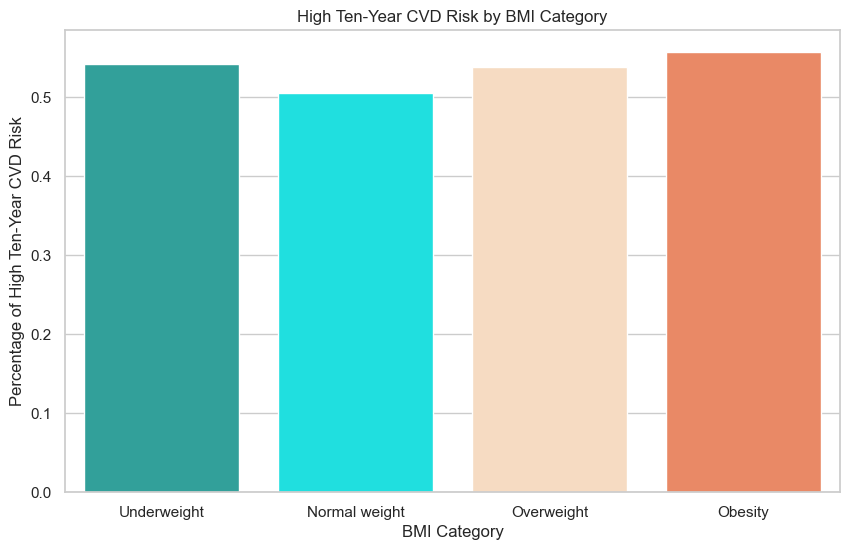

C:\Users\Merin\AppData\Local\Temp\ipykernel_1704\2386406986.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_gender_risk_prevalence = df.groupby(['BMI_Category', 'sex'])['PredictedTenYearScore'].mean().reset_index()
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Merin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

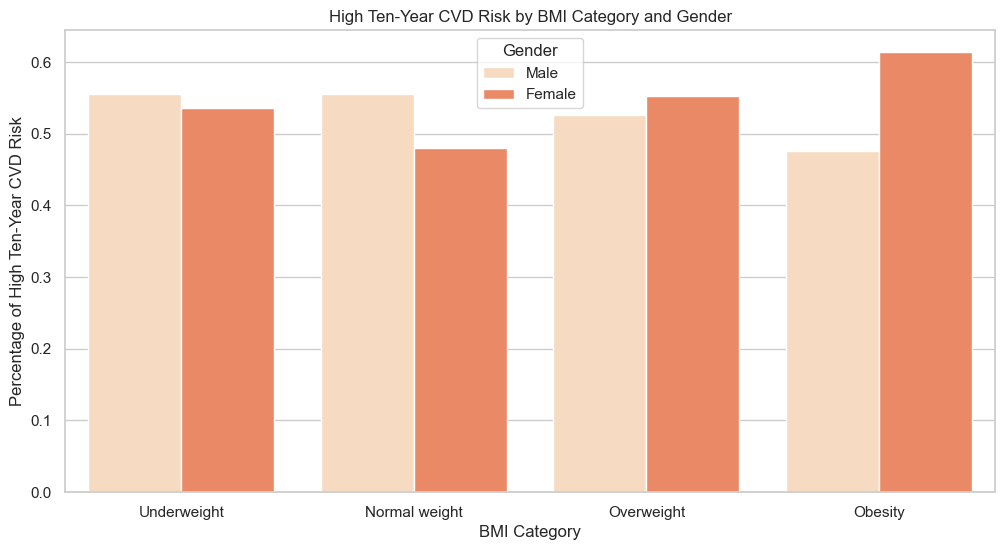

In [25]:
# Select relevant columns for the analysis
columns_of_interest = ['sex', 'BMI', 'PredictedTenYearScore']
df = data[columns_of_interest].copy()

# Define BMI categories without 'Severe obesity'
bins = [0, 18.5, 24.9, 29.9, 39.9]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Calculate the prevalence of TenYear_Score (high risk) by BMI category
bmi_risk_prevalence = df.groupby('BMI_Category')['PredictedTenYearScore'].mean().reset_index()
bmi_risk_prevalence['TenYearCHD'] = bmi_risk_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage

# Bar plot for TenYear_Score by BMI category
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_Category', y='PredictedTenYearScore', data=bmi_risk_prevalence, palette=['#20B2AA', '#00FFFF', '#FFDAB9', '#FF7F50'])
plt.xlabel('BMI Category')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by BMI Category')
plt.show()

# Calculate the prevalence of TenYear_Score (high risk) by BMI category and gender
bmi_gender_risk_prevalence = df.groupby(['BMI_Category', 'sex'])['PredictedTenYearScore'].mean().reset_index()
bmi_gender_risk_prevalence['TenYearCHD'] = bmi_gender_risk_prevalence['PredictedTenYearScore'] * 100  # Convert to percentage
bmi_gender_risk_prevalence['sex'] = bmi_gender_risk_prevalence['sex'].map({1: 'Male', 2: 'Female'})

# Bar plot for TenYear_Score by BMI category and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='BMI_Category', y='PredictedTenYearScore', hue='sex', data=bmi_gender_risk_prevalence, palette=['#FFDAB9', '#FF7F50'])
plt.xlabel('BMI Category')
plt.ylabel('Percentage of High Ten-Year CVD Risk')
plt.title('High Ten-Year CVD Risk by BMI Category and Gender')
plt.legend(title='Gender')
plt.show()

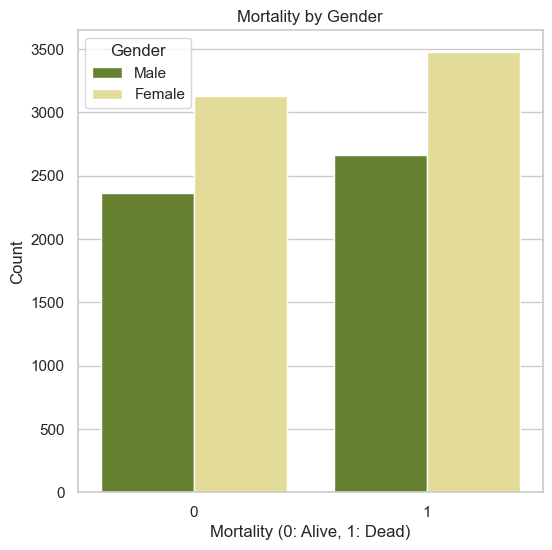

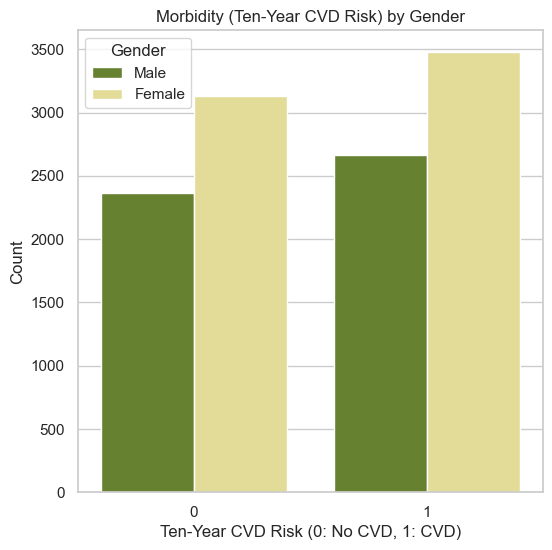

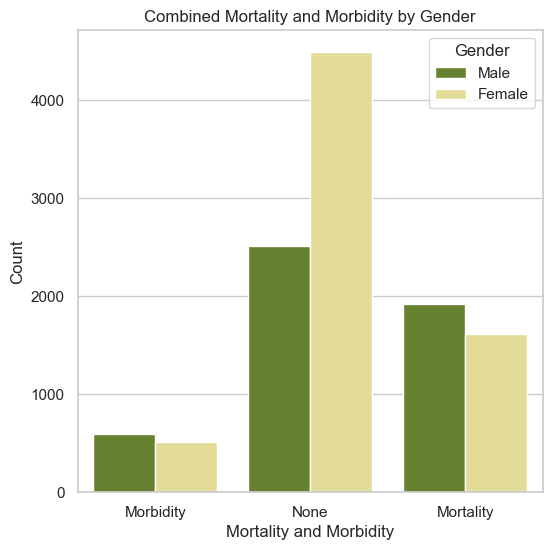

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Merin\Documents\Score_Forumla.csv'
data = pd.read_csv(file_path)

# Select relevant columns for the analysis
columns_of_interest = ['age', 'sex', 'BMI', 'PredictedTenYearScore', 'DEATH', 'CVD', 'ANGINA', 'ANYCHD', 'MI_FCHD', 'STROKE']
df = data[columns_of_interest].copy()

# Convert relevant columns to appropriate data types
df['sex'] = df['sex'].astype(int)
df['DEATH'] = df['DEATH'].astype(int)
df['CVD'] = df['CVD'].astype(int)
df['ANGINA'] = df['ANGINA'].astype(int)
df['ANYCHD'] = df['ANYCHD'].astype(int)
df['MI_FCHD'] = df['MI_FCHD'].astype(int)
df['STROKE'] = df['STROKE'].astype(int)

# Map sex to readable labels
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})

# Plot settings
sns.set(style="whitegrid")

# Visualizing mortality
plt.figure(figsize=(6, 6))
sns.countplot(x='PredictedTenYearScore', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Mortality by Gender')
plt.xlabel('Mortality (0: Alive, 1: Dead)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Visualizing morbidity (Ten-Year CVD Risk)
plt.figure(figsize=(6, 6))
sns.countplot(x='PredictedTenYearScore', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Morbidity (Ten-Year CVD Risk) by Gender')
plt.xlabel('Ten-Year CVD Risk (0: No CVD, 1: CVD)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Creating a combined column for mortality and morbidity
df['Mortality_Morbidity'] = df.apply(lambda row: 'Mortality' if row['DEATH'] == 1 else ('Morbidity' if row['CVD'] == 1 else 'None'), axis=1)

# Visualizing combined mortality and morbidity
plt.figure(figsize=(6, 6))
sns.countplot(x='Mortality_Morbidity', hue='sex', data=df, palette=['#6B8E23', '#F0E68C'])
plt.title('Combined Mortality and Morbidity by Gender')
plt.xlabel('Mortality and Morbidity')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

